<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked.
- This could be useful to instantly provide answers to questions that have already been answered.
- We are tasked with predicting whether a pair of questions are duplicates or not.

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p>
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s):
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>3. Exploratory Data Analysis </h1>

In [2]:
!pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=8aa1c876db4857aee3abc3561d687a0adbc194e373538d425d26bf159fc71d18
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance


In [3]:
!conda install -c conda-forge distance

/bin/bash: line 1: conda: command not found


In [4]:
!pip install fuzzywuzzy


In [5]:
pip install fuzzywuzzy

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

<h2> 3.1 Reading data and basic stats </h2>

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


In [13]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

<Axes: xlabel='is_duplicate'>

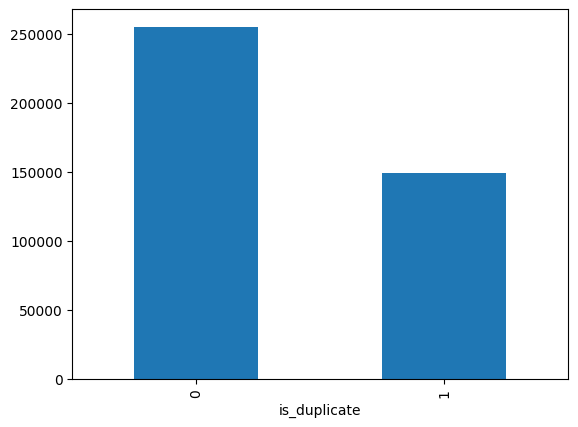

In [15]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [16]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [17]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [18]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



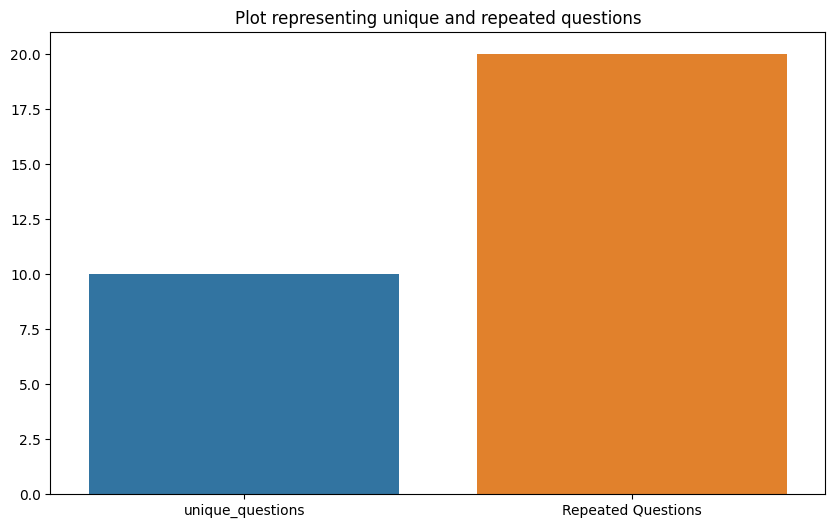

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace this with your actual data)
x = ["unique_questions", "Repeated Questions"]
y = [10, 20]  # Replace with your numerical data

plt.figure(figsize=(10, 6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x=x, y=y)  # Specify x and y as parameters or arguments
plt.show()

<h3>3.2.3 Checking for Duplicates </h3>

In [21]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



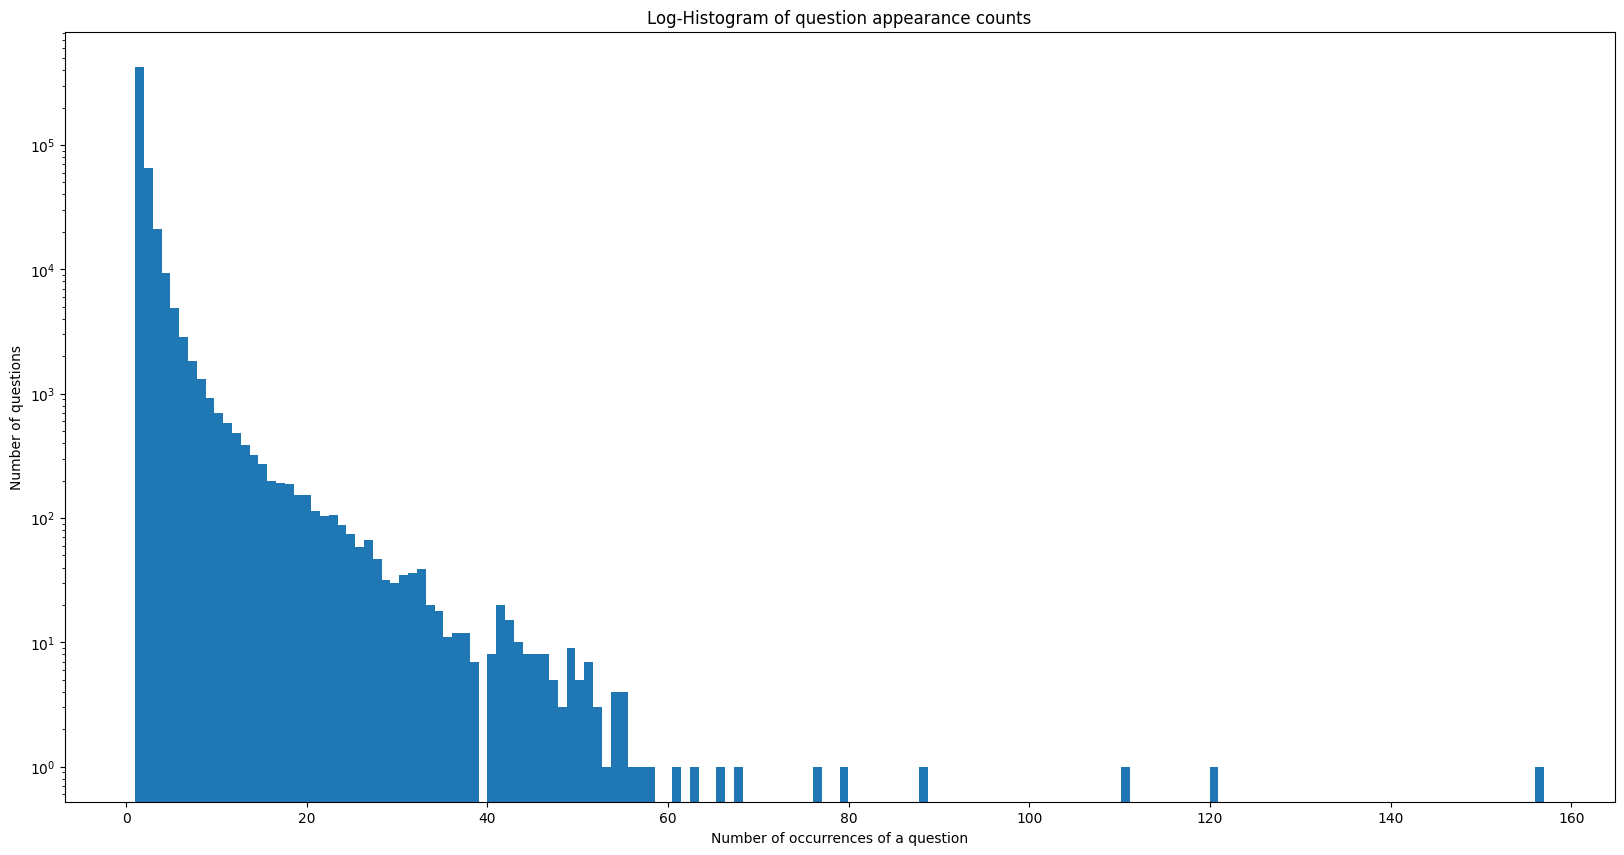

In [23]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurrences of a question')
plt.ylabel('Number of questions')

print('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))


<h3> 3.2.5 Checking for NULL values </h3>

In [24]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


- There are two rows with null values in question2

In [25]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2

In [26]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len()
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   
2  How can Internet speed be increased by hacking...             0          1   
3  Find the remainder when [math]23^{24}[/math] i...             0          1   
4            Which fish would survive in salt water?             0          3   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   
2          1     73     59          14          10          4.0        24.0   
3          1     50     65          11           9          0.0        19.0   
4          1     76     39          13           7          2.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3  
2    0.166667           2           0  
3    0.000000           2           0  
4    0.100000           4           2

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [27]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

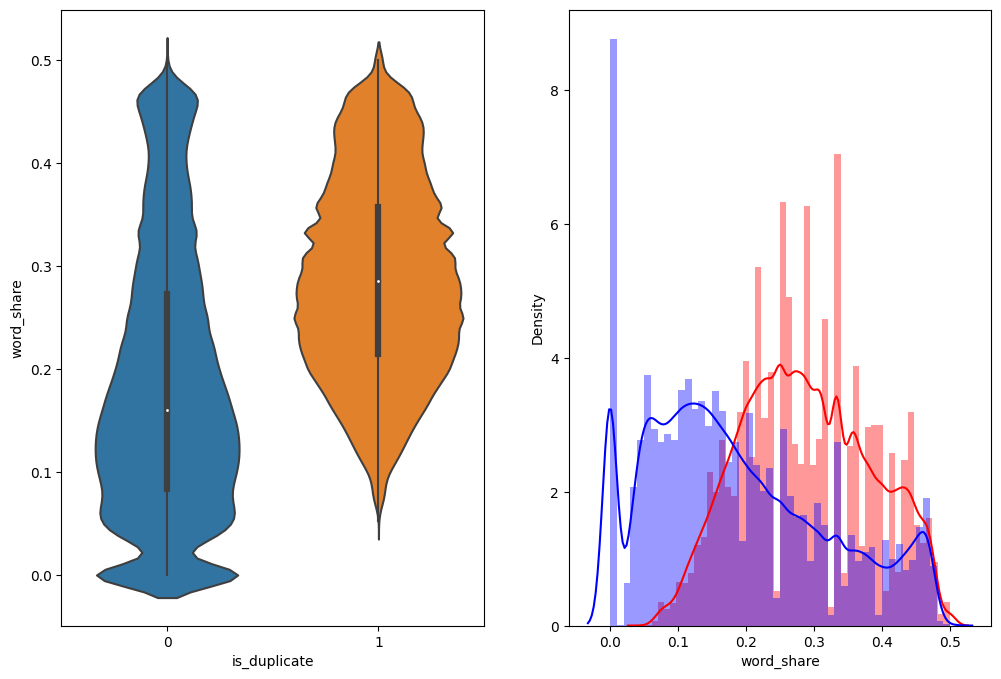

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

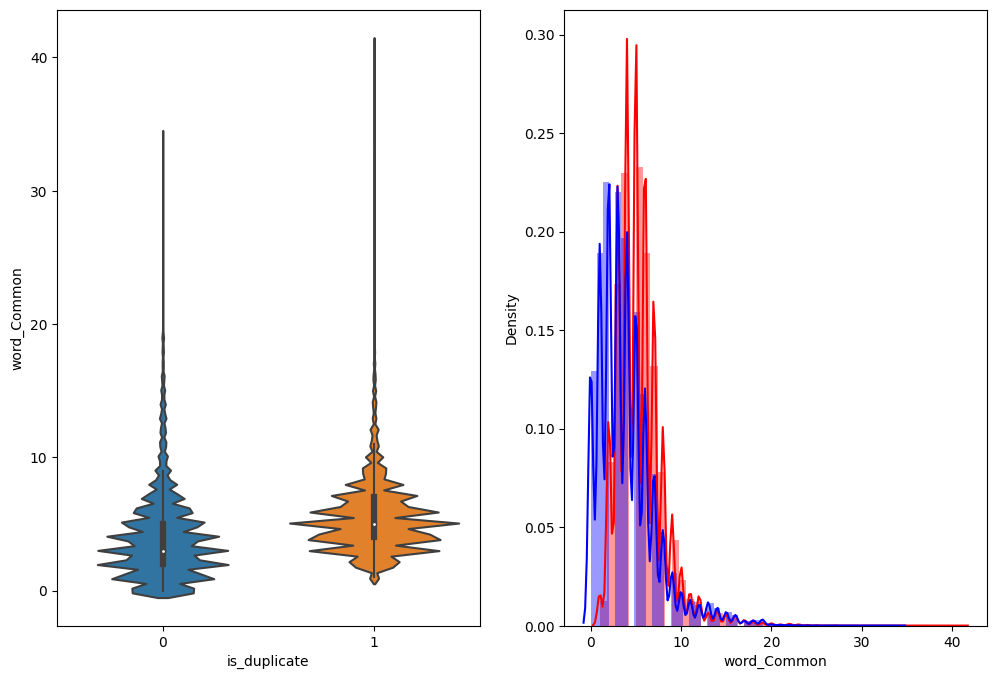

In [29]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

In [30]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [31]:
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)


    porter = PorterStemmer()
    pattern = re.compile('\W')

    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)


    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()


    return x


- Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [35]:
def get_token_features(q1, q2):
    token_features = [0.0]*10

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")

    # Merging Features with dataset

    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)

    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))

    #Computing Fuzzy Features and Merging with Dataset

    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [99]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  first_word_eq  \
0  0.833319  0.999983  0.999983  ...  0.785709           0.0            1.0   
1  0.399996  0.749981  0.599988  ...  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   

   fuzz_partial_ratio  longest_substr_ratio  
0                 100              0.982759  
1                  75              0.596154  

[2 rows x 21 columns]

<h3>3.5.1 Analysis of extracted features </h3>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [38]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [39]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193067


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


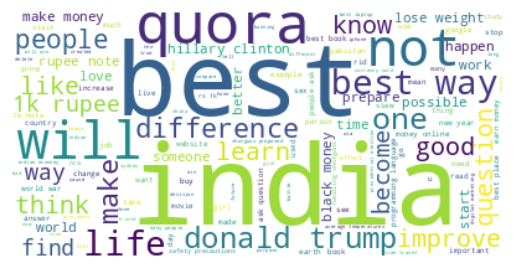

In [40]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


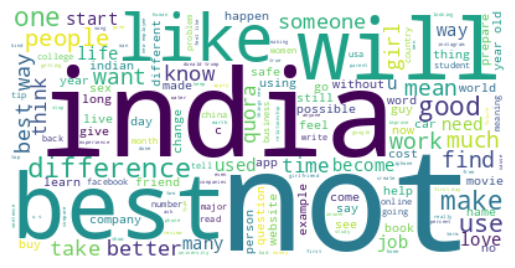

In [41]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

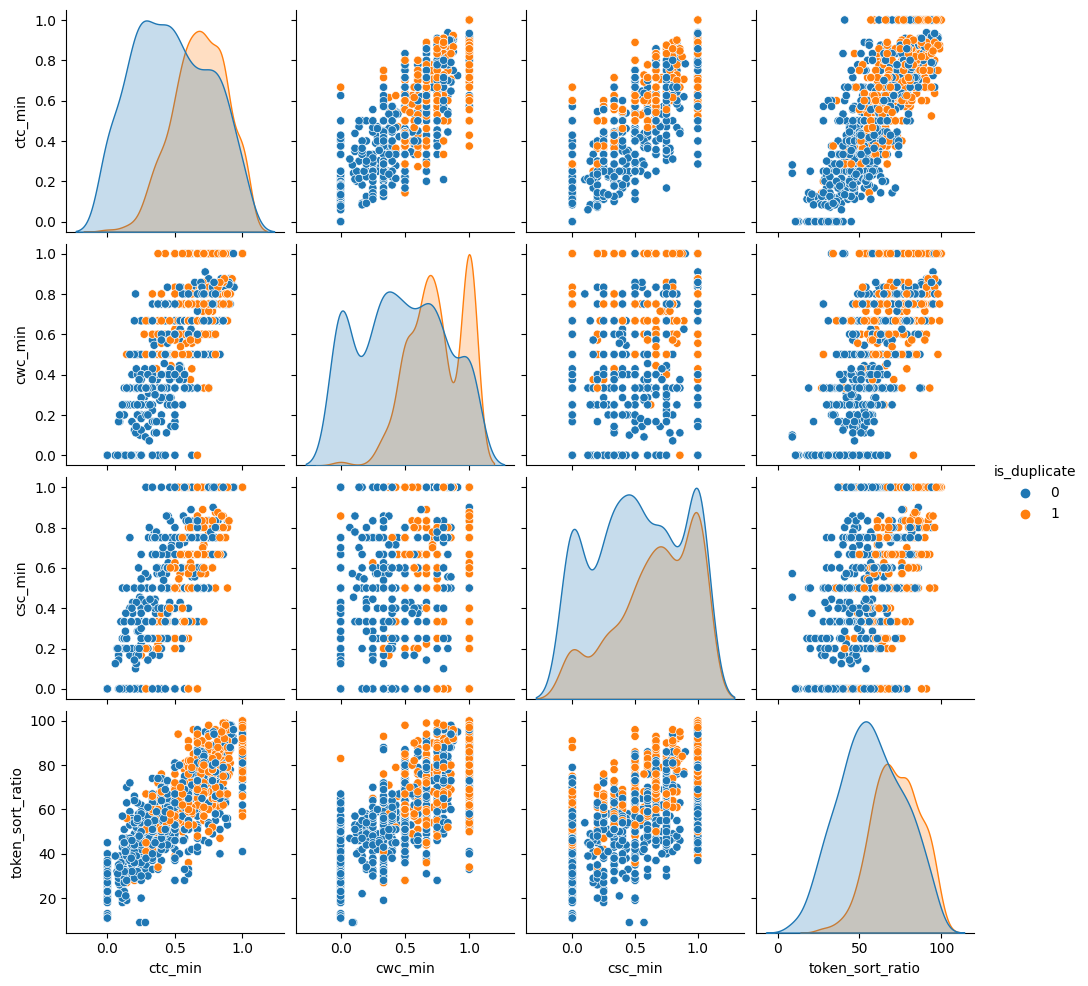

In [50]:
sample_size = 1000  # Define a smaller sample size
n = min(df.shape[0], sample_size)  # Limit the number of rows for plotting
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()


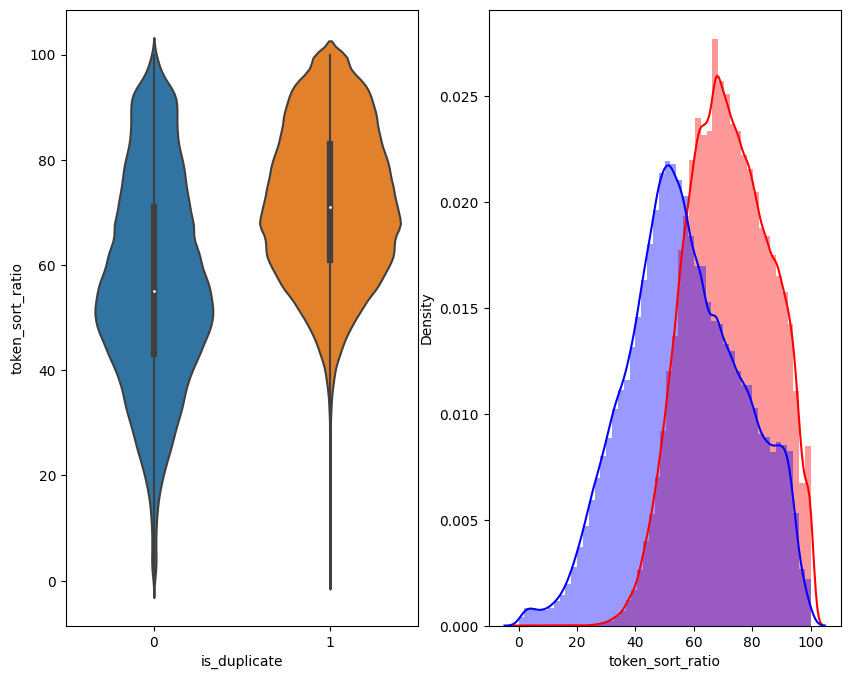

In [44]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

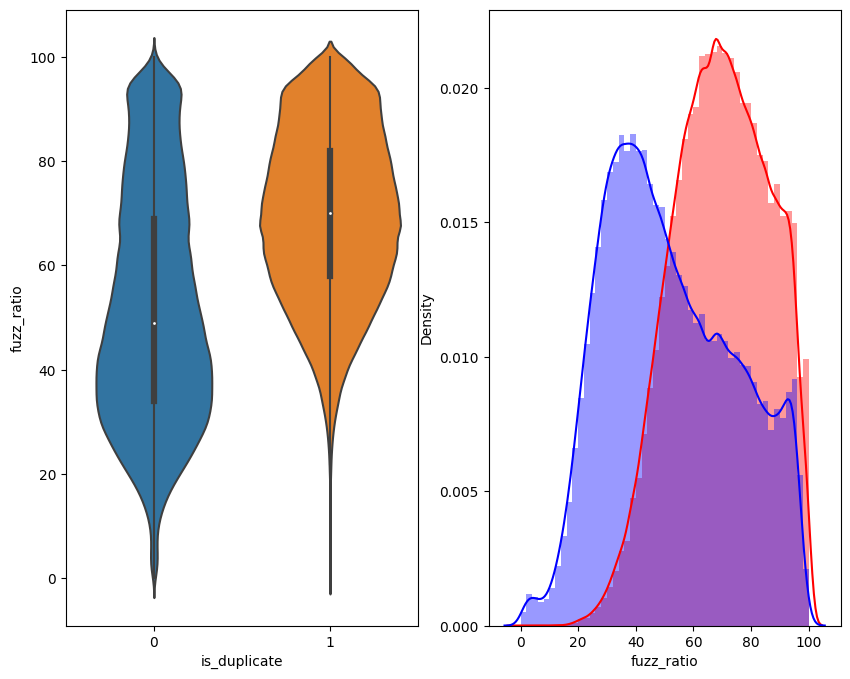

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [53]:
print(dfp_subsampled.columns)


Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio'],
      dtype='object')


In [55]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' ]])
y = dfp_subsampled['is_duplicate'].values

In [56]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.042s...
[t-SNE] Computed neighbors for 5000 samples in 1.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.120165
[t-SNE] Computed conditional probabilities in 0.529s
[t-SNE] Iteration 50: error = 85.3057404, gradient norm = 0.0914036 (50 iterations in 5.859s)
[t-SNE] Iteration 100: error = 70.6710968, gradient norm = 0.0137206 (50 iterations in 4.214s)
[t-SNE] Iteration 150: error = 68.4987411, gradient norm = 0.0088501 (50 iterations in 6.013s)
[t-SNE] Iteration 200: error = 67.4963226, gradient norm = 0.0056383 (50 iterations in 4.127s)
[t-SNE] Iteration 250: error = 66.9508057, gradient norm = 0.0044140

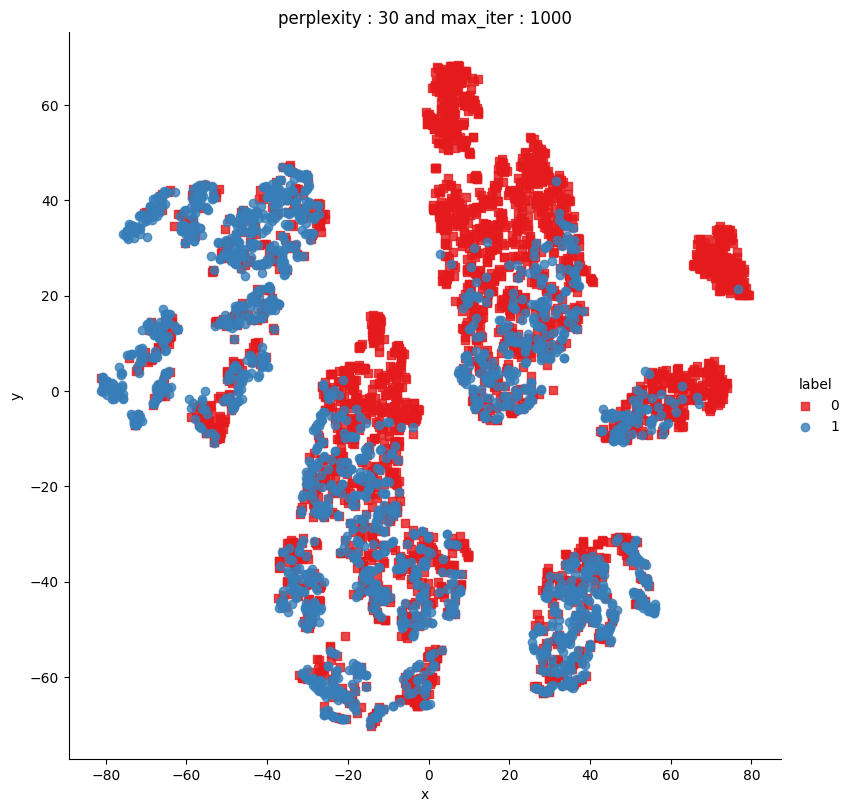

In [58]:
df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Draw the plot in the appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()


In [59]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.014s...
[t-SNE] Computed neighbors for 5000 samples in 0.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.120165
[t-SNE] Computed conditional probabilities in 0.272s
[t-SNE] Iteration 50: error = 85.9654846, gradient norm = 0.0902813 (50 iterations in 14.303s)
[t-SNE] Iteration 100: error = 69.2162247, gradient norm = 0.0084025 (50 iterations in 10.019s)
[t-SNE] Iteration 150: error = 67.4192963, gradient norm = 0.0037307 (50 iterations in 3.877s)
[t-SNE] Iteration 200: error = 66.7968674, gradient norm = 0.0025225 (50 iterations in 4.432s)
[t-SNE] Iteration 250: error = 66.4528809, gradient norm = 0.00192

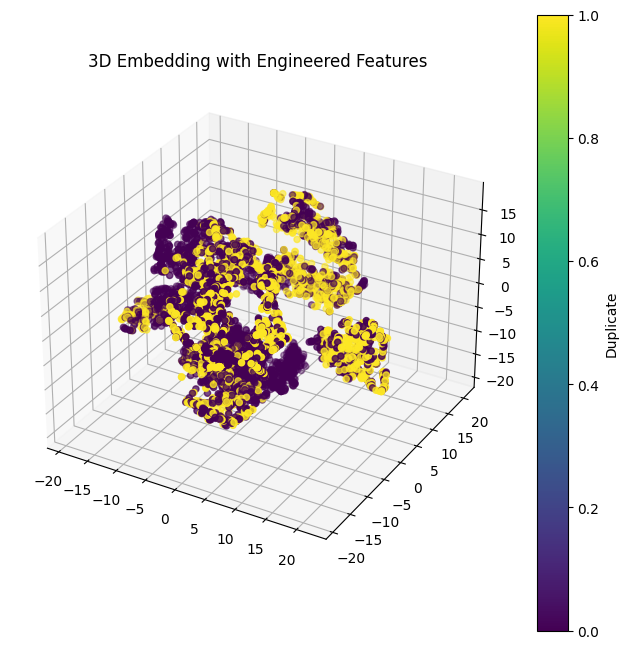

In [74]:
#3D Scatter Plot using Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(tsne3d[:,0], tsne3d[:,1], tsne3d[:,2], c=y, cmap='viridis')
plt.colorbar(sc, label='Duplicate')

ax.set_title('3D Embedding with Engineered Features')
plt.show()


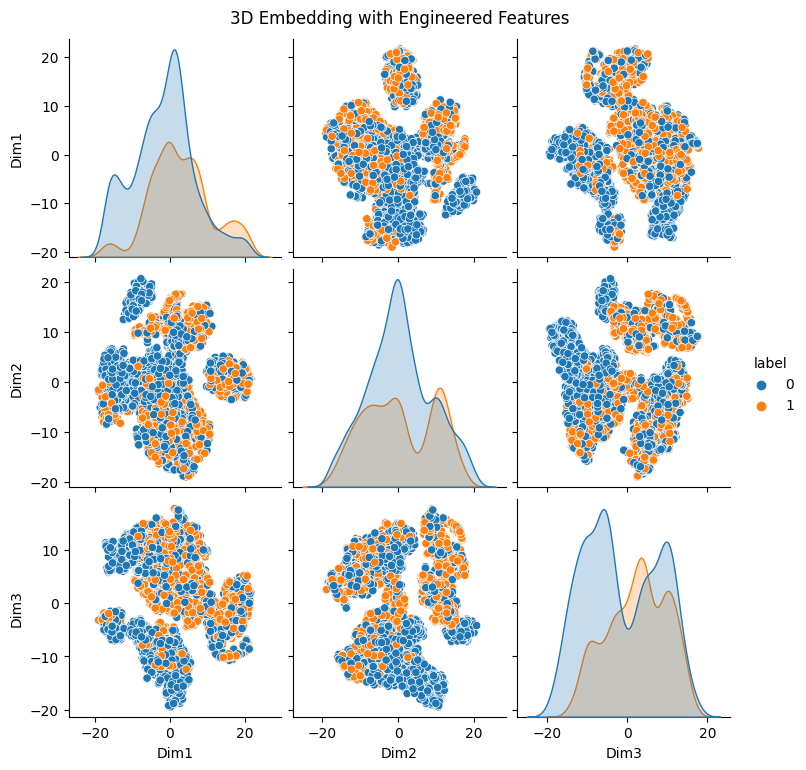

In [75]:
#3D Plot using Seaborn (Pairplot)
import seaborn as sns

# Assuming you're selecting specific dimensions for the pairplot
df_3d = pd.DataFrame({'Dim1': tsne3d[:, 0], 'Dim2': tsne3d[:, 1], 'Dim3': tsne3d[:, 2], 'label': y})
sns.pairplot(df_3d, hue='label')
plt.suptitle('3D Embedding with Engineered Features', y=1.02)
plt.show()


<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [7]:
# avoid decoding problems
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [79]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False)
tfidf.fit(questions)

# Get the feature names from the TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

# Create a dictionary with key: word and value: tf-idf score
word2tfidf = dict(zip(feature_names, tfidf.idf_))


- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics.

In [82]:
import en_core_web_sm

In [84]:
import en_core_web_sm
import numpy as np
from tqdm import tqdm

nlp = en_core_web_sm.load()
vecs1 = []
for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1)
    mean_vec1 = np.zeros((len(doc1), 384))
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
            # Broadcasting idf to match the shape of vec1
            idf_broadcasted = np.full_like(vec1, idf)
            mean_vec1 += vec1 * idf_broadcasted
        except:
            continue
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)


100%|██████████| 404290/404290 [1:06:40<00:00, 101.05it/s]


In [86]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2)
    mean_vec2 = np.zeros((len(doc2), 384))
    for word2 in doc2:
        vec2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
            # Broadcasting idf to match the shape of vec2
            idf_broadcasted = np.full_like(vec2, idf)
            mean_vec2 += vec2 * idf_broadcasted
        except:
            continue
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)


100%|██████████| 404290/404290 [1:06:30<00:00, 101.30it/s]


In [10]:
import en_core_web_sm
import numpy as np
from tqdm import tqdm

nlp = en_core_web_sm.load()
vecs1 = []
# Process the first 1000 rows of 'question1'
for qu1 in tqdm(list(df['question1'][:1000])):
    doc1 = nlp(qu1)
    mean_vec1 = np.zeros(384)  # Shape changed to (384,) for mean vector
    count = 0
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf.get(str(word1), default_idf)
            mean_vec1 += vec1 * idf
            count += 1
        except:
            continue
    # Calculate the mean vector using count
    if count != 0:
        mean_vec1 /= count
    vecs1.append(mean_vec1)

# Create a DataFrame to hold the values for the first 1000 rows
df_temp = df.head(1000)
df_temp['q1_feats_m'] = vecs1

# Assign features for the first 1000 rows in the original DataFrame
df.loc[:999, 'q1_feats_m'] = df_temp['q1_feats_m'].values


100%|██████████| 1000/1000 [00:11<00:00, 89.47it/s]


In [11]:
vecs2 = []
# Process the first 1000 rows of 'question2'
for qu2 in tqdm(list(df['question2'][:1000])):
    doc2 = nlp(qu2)
    mean_vec2 = np.zeros(384)  # Shape changed to (384,) for mean vector
    count = 0
    for word2 in doc2:
        vec2 = word2.vector
        try:
            idf = word2tfidf.get(str(word2), default_idf)
            mean_vec2 += vec2 * idf
            count += 1
        except:
            continue
    # Calculate the mean vector using count
    if count != 0:
        mean_vec2 /= count
    vecs2.append(mean_vec2)

# Create a DataFrame to hold the values for the first 1000 rows
df_temp = df.head(1000)
df_temp['q2_feats_m'] = vecs2

# Assign features for the first 1000 rows in the original DataFrame
df.loc[:999, 'q2_feats_m'] = df_temp['q2_feats_m'].values


100%|██████████| 1000/1000 [00:10<00:00, 93.94it/s]


In [12]:
import pandas as pd

# Your other code here
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv", encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv", encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")


In [13]:
# Drop unnecessary columns from respective DataFrames
df1 = dfnlp.drop(['qid1', 'qid2', 'question1', 'question2'], axis=1)
df2 = dfppro.drop(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], axis=1)
df3 = df.drop(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], axis=1)

# Initialize empty lists
vecs_q1 = []
vecs_q2 = []

# Convert values to list while handling NaN and float values
for idx, row in df3.iterrows():
    q1_feats = row['q1_feats_m']
    q2_feats = row['q2_feats_m']

    # Check if the value is iterable or not (non-iterable values are usually NaN or floats)
    if isinstance(q1_feats, (list, np.ndarray)):
        vecs_q1.append(q1_feats)
    else:
        vecs_q1.append([np.nan] * 384)  # Replace non-iterable values with NaN-filled lists

    if isinstance(q2_feats, (list, np.ndarray)):
        vecs_q2.append(q2_feats)
    else:
        vecs_q2.append([np.nan] * 384)  # Replace non-iterable values with NaN-filled lists

# Create DataFrames with modified feature lists
df3_q1 = pd.DataFrame(vecs_q1, index=df3.index)
df3_q2 = pd.DataFrame(vecs_q2, index=df3.index)


In [14]:
import numpy as np

# Remove missing values in 'q1_feats_m' and 'q2_feats_m'
df3_q1 = pd.DataFrame(df['q1_feats_m'].apply(lambda x: x if isinstance(x, list) else [np.nan]*384).tolist(), index=df.index)
df3_q2 = pd.DataFrame(df['q2_feats_m'].apply(lambda x: x if isinstance(x, list) else [np.nan]*384).tolist(), index=df.index)


In [15]:
# dataframe of nlp features
df1.head()

id  is_duplicate   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
0   0             0  0.999980  0.833319  0.999983  0.999983  0.916659   
1   1             0  0.799984  0.399996  0.749981  0.599988  0.699993   
2   2             0  0.399992  0.333328  0.399992  0.249997  0.399996   
3   3             0  0.000000  0.000000  0.000000  0.000000  0.000000   
4   4             0  0.399992  0.199998  0.999950  0.666644  0.571420   

    ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0  0.785709           0.0            1.0           2.0      13.0   
1  0.466664           0.0            1.0           5.0      12.5   
2  0.285712           0.0            1.0           4.0      12.0   
3  0.000000           0.0            0.0           2.0      12.0   
4  0.307690           0.0            1.0           6.0      10.0   

   token_set_ratio  token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  \
0              100                93          93                 100   
1               86                63          66                  75   
2               63                63          43                  47   
3               28                24           9                  14   
4               67                47          35                  56   

   longest_substr_ratio  
0              0.982759  
1              0.596154  
2              0.166667  
3              0.039216  
4              0.175000

In [16]:
# data before preprocessing
df2.head()

id  freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
0   0          1          1     66     57          14          12   
1   1          4          1     51     88           8          13   
2   2          1          1     73     59          14          10   
3   3          1          1     50     65          11           9   
4   4          3          1     76     39          13           7   

   word_Common  word_Total  word_share  freq_q1+q2  freq_q1-q2  
0         10.0        23.0    0.434783           2           0  
1          4.0        20.0    0.200000           5           3  
2          4.0        24.0    0.166667           2           0  
3          0.0        19.0    0.000000           2           0  
4          2.0        20.0    0.100000           4           2

In [17]:
# Questions 1 tfidf weighted word2vec
df3_q1.head()

0    1    2    3    4    5    6    7    8    9    ...  374  375  376  377  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   378  379  380  381  382  383  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 384 columns]

In [18]:
# Questions 2 tfidf weighted word2vec
df3_q2.head()

0    1    2    3    4    5    6    7    8    9    ...  374  375  376  377  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

   378  379  380  381  382  383  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 384 columns]

In [19]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 384
Number of features in question2 w2v  dataframe : 384
Number of features in final dataframe  : 797


In [6]:
import pandas as pd

chunk_size = 10000  # Define the chunk size

# Load the necessary datasets
df1 = pd.read_csv("nlp_features_train.csv", encoding='latin-1')
df2 = pd.read_csv("df_fe_without_preprocessing_train.csv", encoding='latin-1')

# Process the data in chunks and write to CSV
for chunk_df1 in pd.read_csv('nlp_features_train.csv', chunksize=chunk_size):
    chunk_df2 = df2.loc[df2['id'].isin(chunk_df1['id'])]
    df3_q1 = chunk_df1  # Perform any necessary operations on chunk_df1
    df3_q2 = chunk_df2  # Perform any necessary operations on chunk_df2
    result = df3_q1.merge(df3_q2, on='id', how='left')
    result.to_csv('final_features_chunk.csv', mode='a', header=(not os.path.isfile('final_features_chunk.csv')), index=False)


In [18]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedKFold


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
# from sklearn.cross_validation import StratifiedKFold
# from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [ ]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features_chunk.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows


In [1]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall()
    print(tables[0][0])
    return(len(tables))

In [3]:
import sqlite3

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except sqlite3.Error as e:
        print(e)


In [7]:
# try to sample data according to the computing power you have
import os
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ;", conn_r)
        conn_r.commit()
        conn_r.close()

In [9]:
print(data.shape[0])  # Print the number of rows in the DataFrame


0


In [12]:
# Assuming data loading has occurred, the `data` DataFrame is being used for operations

if not data.empty:
    # Check if the DataFrame is not empty
    data.drop(data.index[0], inplace=True)
    y_true = data['is_duplicate']
    data.drop(['Unnamed: 0', 'id', 'index', 'is_duplicate'], axis=1, inplace=True)
else:
    print("DataFrame 'data' is empty. Check the data loading process.")


DataFrame 'data' is empty. Check the data loading process.


In [13]:
data.head()

Empty DataFrame
Columns: [index, Unnamed: 0, id, is_duplicate, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, 54_x, 55_x, 56_x, 57_x, 58_x, 59_x, 60_x, 61_x, 62_x, 63_x, 64_x, 65_x, 66_x, 67_x, 68_x, 69_x, ...]
Index: []

[0 rows x 798 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 798 entries, index to 383_y
dtypes: object(798)
memory usage: 0.0+ bytes


In [19]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
import numpy as np
import pandas as pd
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [25]:
y_true = data['is_duplicate']


In [23]:
# Print all column names to identify the correct name
print(data.columns)


Index(['index', 'Unnamed: 0', 'id', 'is_duplicate', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       ...
       '374_y', '375_y', '376_y', '377_y', '378_y', '379_y', '380_y', '381_y',
       '382_y', '383_y'],
      dtype='object', length=798)


<h2> 4.3 Random train test split( 70:30) </h2>

In [30]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 794)
Number of data points in test data : (121287, 794)


In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    plt.figure(figsize=(20,4))

    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8876992330072402


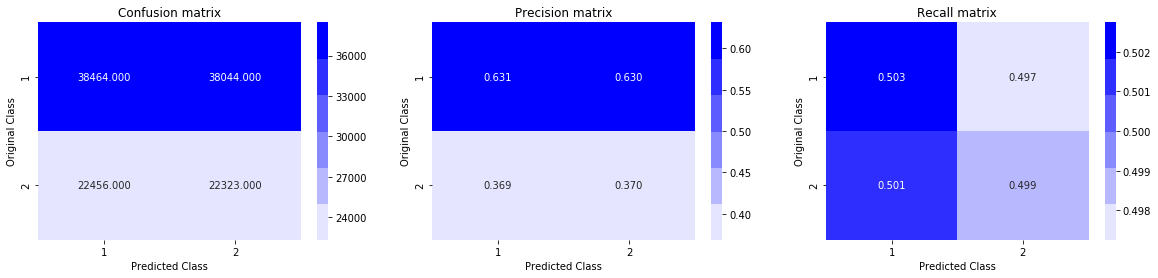

In [ ]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5050464987596055
For values of alpha =  0.0001 The log loss is: 0.5156064161083074
For values of alpha =  0.001 The log loss is: 0.5118124206289113
For values of alpha =  0.01 The log loss is: 0.5215407246451201
For values of alpha =  0.1 The log loss is: 0.49485550469453093
For values of alpha =  1 The log loss is: 0.47346295882439915
For values of alpha =  10 The log loss is: 0.5062282696956512


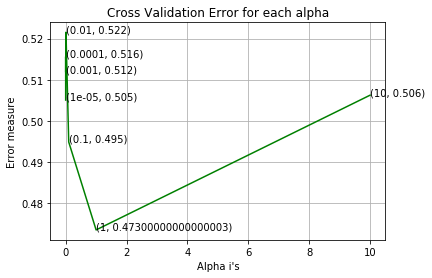

For values of best alpha =  1 The train log loss is: 0.4712558809818194
For values of best alpha =  1 The test log loss is: 0.47346295882439915
Total number of data points : 121287


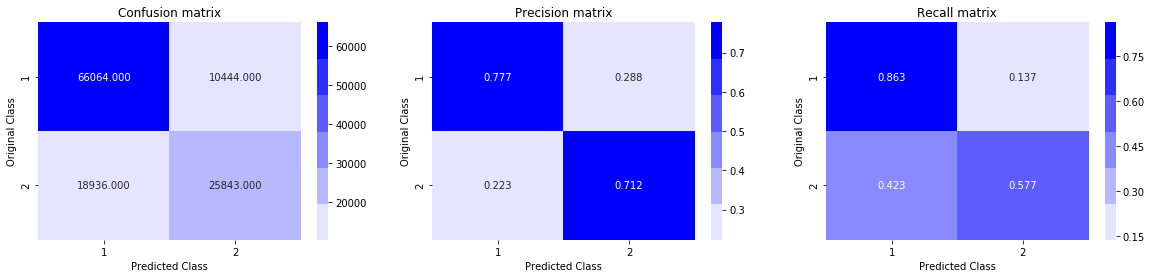

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

SGD is sensitive to feature scaling, so did scaling and tried.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)

For values of alpha =  1e-05 The log loss is: 0.45683456744359
For values of alpha =  0.0001 The log loss is: 0.45492081462801304
For values of alpha =  0.001 The log loss is: 0.40559361222633294
For values of alpha =  0.01 The log loss is: 0.40761367674333254
For values of alpha =  0.1 The log loss is: 0.44362792720222327
For values of alpha =  1 The log loss is: 0.5000580130072036
For values of alpha =  10 The log loss is: 0.5704629435817549


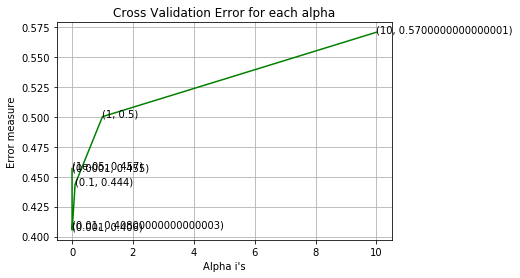

For values of best alpha =  0.001 The train log loss is: 0.4031443854177573
For values of best alpha =  0.001 The test log loss is: 0.40559361222633294
Total number of data points : 121287


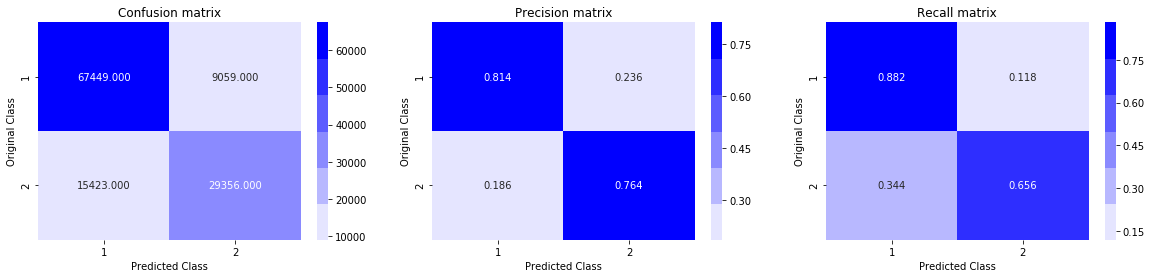

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.000862 The log loss is: 0.4075498397239791
For values of alpha =  0.001017 The log loss is: 0.40539250011035743
For values of alpha =  0.001226 The log loss is: 0.4034425566208746
For values of alpha =  0.001482 The log loss is: 0.4019625978302733
For values of alpha =  0.00212 The log loss is: 0.40043503086001114
For values of alpha =  0.003 The log loss is: 0.40034152313699967
For values of alpha =  0.00314 The log loss is: 0.4004166666193004
For values of alpha =  0.003153 The log loss is: 0.4004249565995252
For values of alpha =  0.003568 The log loss is: 0.4007241237416872
For values of alpha =  0.003988 The log loss is: 0.40110250715655493
For values of alpha =  0.004111 The log loss is: 0.4012226624599859
For values of alpha =  0.005223 The log loss is: 0.4024120323437416
For values of alpha =  0.005941 The log loss is: 0.40322094282826937
For values of alpha =  0.00595 The log loss is: 0.4032311500519025


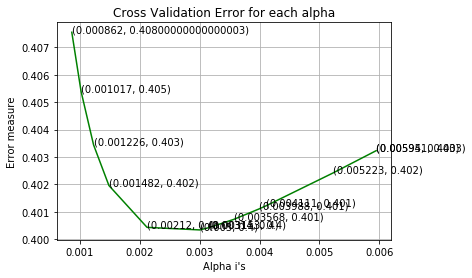

For values of best alpha =  0.003 The train log loss is: 0.39784383489862885
For values of best alpha =  0.003 The test log loss is: 0.40034152313699967
Total number of data points : 121287


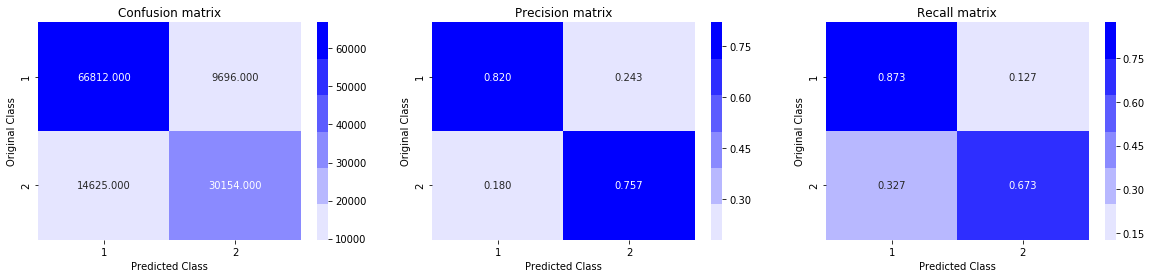

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------
np.random.seed(45)
alpha = np.random.uniform(0.0006,0.006,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.47459282302213923
For values of alpha =  0.0001 The log loss is: 0.46819163734685043
For values of alpha =  0.001 The log loss is: 0.43159379565435446
For values of alpha =  0.01 The log loss is: 0.42292019437911754
For values of alpha =  0.1 The log loss is: 0.5260749681006414
For values of alpha =  1 The log loss is: 0.6585278256322723
For values of alpha =  10 The log loss is: 0.6585278256322611


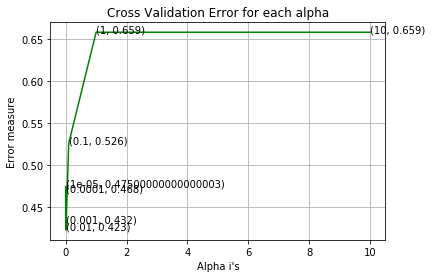

For values of best alpha =  0.01 The train log loss is: 0.4223724082952659
For values of best alpha =  0.01 The test log loss is: 0.42292019437911754
Total number of data points : 121287


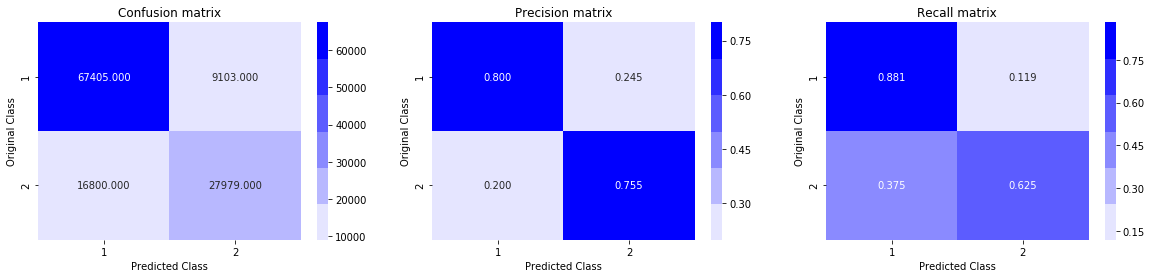

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.46827517367892096
For values of alpha =  0.0001 The log loss is: 0.45775339387339004
For values of alpha =  0.001 The log loss is: 0.42313495536418577
For values of alpha =  0.01 The log loss is: 0.40541772273229554
For values of alpha =  0.1 The log loss is: 0.4313071929003579
For values of alpha =  1 The log loss is: 0.4730453418766842
For values of alpha =  10 The log loss is: 0.5272789313684569


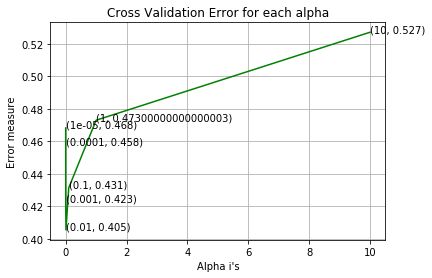

For values of best alpha =  0.01 The train log loss is: 0.4027358236207044
For values of best alpha =  0.01 The test log loss is: 0.40541772273229554
Total number of data points : 121287


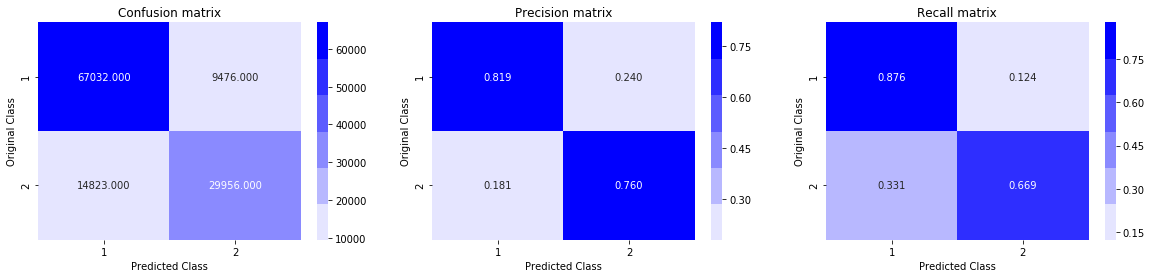

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.00517 The log loss is: 0.4037706351092166
For values of alpha =  0.00529 The log loss is: 0.4036245330070321
For values of alpha =  0.00721 The log loss is: 0.4038591515869226
For values of alpha =  0.00981 The log loss is: 0.4052693810491646
For values of alpha =  0.01228 The log loss is: 0.40630937344731693
For values of alpha =  0.01327 The log loss is: 0.4068733679114762
For values of alpha =  0.01351 The log loss is: 0.4067584415367667
For values of alpha =  0.01425 The log loss is: 0.40712629206352663
For values of alpha =  0.01452 The log loss is: 0.40718224970845057
For values of alpha =  0.01757 The log loss is: 0.40882766620678973
For values of alpha =  0.0183 The log loss is: 0.4091457931830299
For values of alpha =  0.01839 The log loss is: 0.4091050200862671
For values of alpha =  0.02118 The log loss is: 0.41044869825018293
For values of alpha =  0.02636 The log loss is: 0.4126434814409032


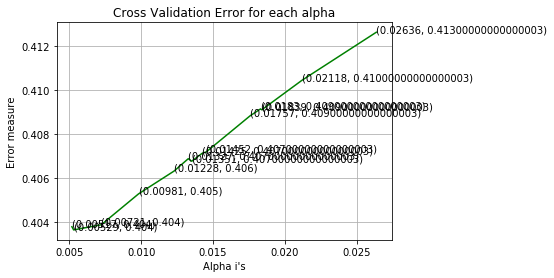

For values of best alpha =  0.00529 The train log loss is: 0.4008580635552486
For values of best alpha =  0.00529 The test log loss is: 0.4036245330070321
Total number of data points : 121287


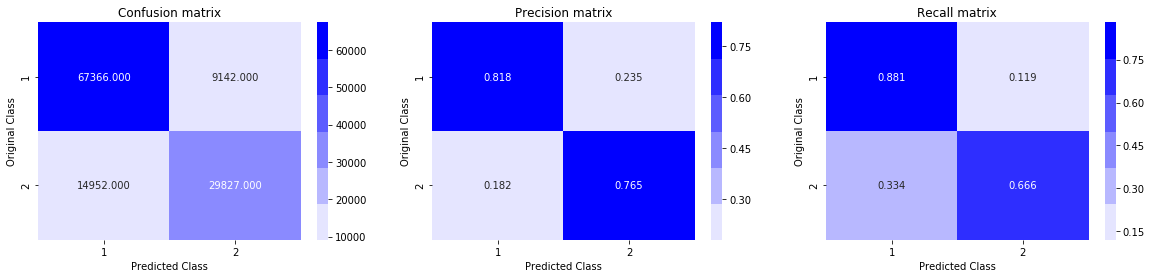

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------

np.random.seed(25)
alpha = np.random.uniform(0.002,0.03,14)
alpha = np.round(alpha,5)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y,eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 Random Forest </h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

estimators =  100 Train Log Loss  0.11109459647005955 Test Log Loss  0.37192988174912683
estimators =  150 Train Log Loss  0.11100847787606712 Test Log Loss  0.37065163655861083
estimators =  200 Train Log Loss  0.11056444275163889 Test Log Loss  0.3698413672093776
estimators =  300 Train Log Loss  0.11035449276121001 Test Log Loss  0.3690804893102336
estimators =  400 Train Log Loss  0.11047904985310375 Test Log Loss  0.3693838339921741
estimators =  600 Train Log Loss  0.11021203125673375 Test Log Loss  0.36823350864534526
estimators =  800 Train Log Loss  0.11039528102117314 Test Log Loss  0.3688582117860808


Text(0,0.5,'Log Loss')

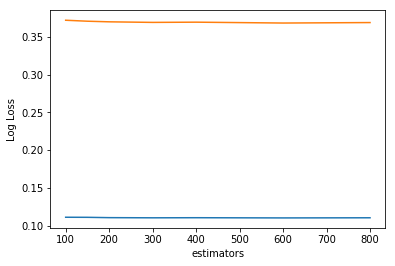

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') n
plt.ylabel('Log Loss')

Depth =  5 Train Log Loss  0.48722729508327145 Test Log Loss  0.48813291311027934
Depth =  10 Train Log Loss  0.4081238487571798 Test Log Loss  0.4225459782185362
Depth =  12 Train Log Loss  0.37408662763549844 Test Log Loss  0.4074103602751899
Depth =  15 Train Log Loss  0.3079064316463802 Test Log Loss  0.38802805760307507
Depth =  20 Train Log Loss  0.20481718757448902 Test Log Loss  0.3743196152422552
Depth =  25 Train Log Loss  0.14326963278706298 Test Log Loss  0.37110604544161335
Depth =  50 Train Log Loss  0.11139277276272488 Test Log Loss  0.3715810469258812


Text(0,0.5,'Log Loss')

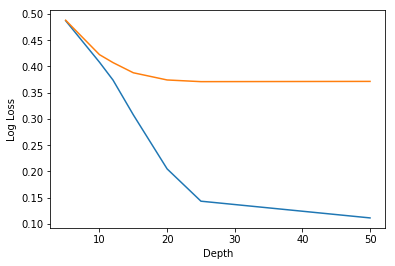

In [ ]:
Depth = [5,10,12,15,20,25,50]
test_scores = []
train_scores = []
for i in Depth:
    clf = RFC(n_estimators=100,max_depth=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Depth = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(Depth,train_scores,label='Train Log Loss')
plt.plot(Depth,test_scores,label='Test Log Loss')
plt.xlabel('Depth')
plt.ylabel('Log Loss')

estimators =  100 Train Log Loss  0.39289057215728057 Test Log Loss  0.4154641445550544
estimators =  150 Train Log Loss  0.3916522623500148 Test Log Loss  0.4145023288788135
estimators =  200 Train Log Loss  0.39088408416850556 Test Log Loss  0.413370659547225
estimators =  300 Train Log Loss  0.39465656231621055 Test Log Loss  0.41716846990811174
estimators =  400 Train Log Loss  0.3913998286278825 Test Log Loss  0.4138491796713054
estimators =  600 Train Log Loss  0.39318544549179174 Test Log Loss  0.4156994049185631
estimators =  800 Train Log Loss  0.3919437224404921 Test Log Loss  0.4143914497614524


Text(0,0.5,'Log Loss')

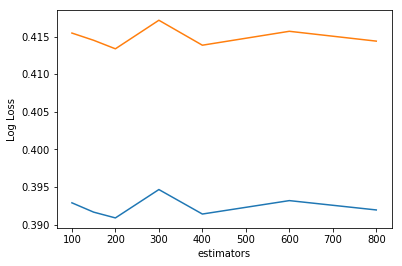

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=11,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

<h2> 4.7 XGBoost </h2>

In [ ]:
import xgboost as xgb

estimators =  100 Train Log Loss  0.3583641938531458 Test Log Loss  0.35961819366299197
estimators =  150 Train Log Loss  0.34716821707657336 Test Log Loss  0.3493991268629394
estimators =  200 Train Log Loss  0.339620979084566 Test Log Loss  0.34292007832953664
estimators =  300 Train Log Loss  0.3301188189311435 Test Log Loss  0.3358950724784673
estimators =  400 Train Log Loss  0.32337384734119523 Test Log Loss  0.33159850014983644
estimators =  600 Train Log Loss  0.3130198865512778 Test Log Loss  0.32630453308630486
estimators =  800 Train Log Loss  0.30483396799846996 Test Log Loss  0.3230216993976186


Text(0,0.5,'Log Loss')

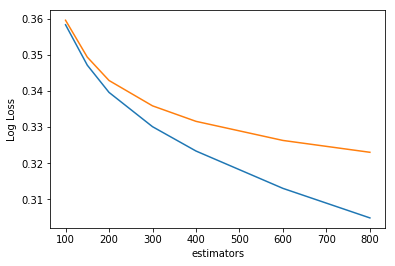

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in depths:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

Learning Rate =  0.05 Train Log Loss  0.3431145884649425 Test Log Loss  0.34599386091965273
Learning Rate =  0.1 Train Log Loss  0.3264772174456944 Test Log Loss  0.3333956069010313
Learning Rate =  0.15 Train Log Loss  0.31652482578279084 Test Log Loss  0.3278496386770277
Learning Rate =  0.2 Train Log Loss  0.3094281555236832 Test Log Loss  0.32583108629355173
Learning Rate =  0.25 Train Log Loss  0.30336320048274407 Test Log Loss  0.3243467612783949
Learning Rate =  0.3 Train Log Loss  0.2974955443733094 Test Log Loss  0.3225233032247901


Text(0,0.5,'Log Loss')

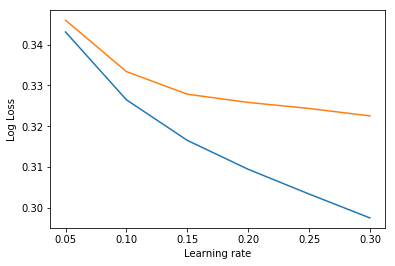

In [ ]:
test_scores = []
train_scores = []
etas = [0.05,0.1,0.15,0.2,0.25,0.3]
for i in etas:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=i,n_estimators=350,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Learning Rate = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(etas,train_scores,label='Train Log Loss')
plt.plot(etas,test_scores,label='Test Log Loss')
plt.xlabel('Learning rate')
plt.ylabel('Log Loss')

reg_alpha =  0.5 Train Log Loss  0.26852223284338356 Test Log Loss  0.3312034872387728
reg_alpha =  1 Train Log Loss  0.26735883582307046 Test Log Loss  0.33056092032224055
reg_alpha =  5 Train Log Loss  0.2689006319588199 Test Log Loss  0.3292621067563762
reg_alpha =  10 Train Log Loss  0.27068857032690075 Test Log Loss  0.327132773020531
reg_alpha =  50 Train Log Loss  0.27974802262650905 Test Log Loss  0.3239947646462191
reg_alpha =  100 Train Log Loss  0.29039765847245264 Test Log Loss  0.32466225063664067
reg_alpha =  150 Train Log Loss  0.29908412709272575 Test Log Loss  0.3264270224443026


Text(0,0.5,'Log Loss')

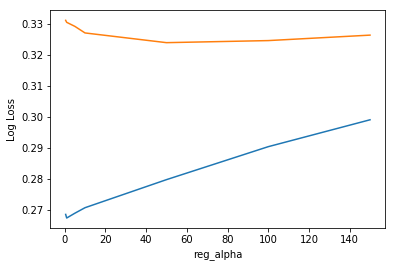

In [ ]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.65,n_estimators=370,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

The test log loss is: 0.3663235114698256


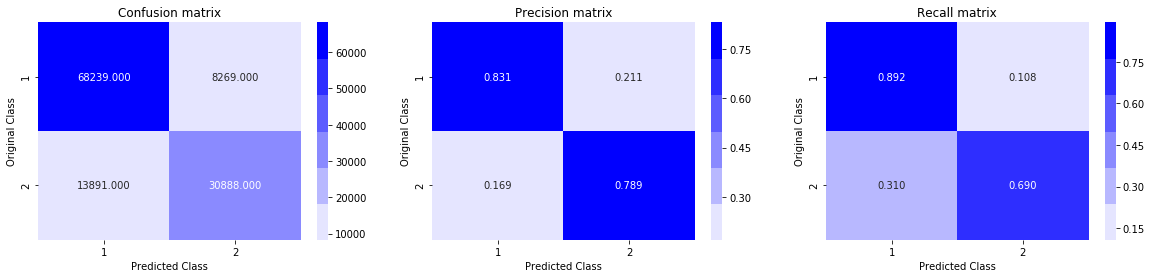

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.02,n_estimators=400,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

Sampled data and did further hyperparam truning because of time constraints. random search for 15 models took around one day and then my system is not responding.

In [ ]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
# remove the first row
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
data = pd.DataFrame(np.array(data.values,dtype=np.float64),columns=cols)

In [ ]:
y_true = list(map(int, y_true.values))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3,random_state=13)

In [ ]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


estimators =  100 Train Log Loss  0.3548561992467385 Test Log Loss  0.3627878957743776
estimators =  150 Train Log Loss  0.3419396997944057 Test Log Loss  0.35407105466366096
estimators =  200 Train Log Loss  0.3318797377522653 Test Log Loss  0.34891807315988954
estimators =  300 Train Log Loss  0.3168242151591801 Test Log Loss  0.343288478096738
estimators =  400 Train Log Loss  0.30455667545383736 Test Log Loss  0.33974266566115263
estimators =  600 Train Log Loss  0.283669436630139 Test Log Loss  0.3359795288017877
estimators =  800 Train Log Loss  0.26592577978587245 Test Log Loss  0.3345965160762109


Text(0,0.5,'Log Loss')

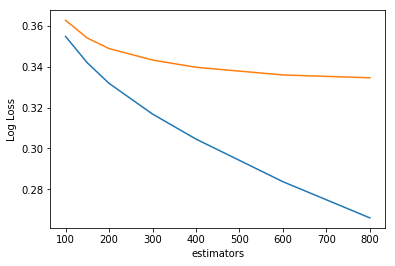

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

Learning Rate =  0.05 Train Log Loss  0.3486359981449816 Test Log Loss  0.3585428590734305
Learning Rate =  0.1 Train Log Loss  0.323761992687137 Test Log Loss  0.34551035487138326
Learning Rate =  0.15 Train Log Loss  0.30719720409078277 Test Log Loss  0.3405323742802464
Learning Rate =  0.2 Train Log Loss  0.2930345805370733 Test Log Loss  0.3385715798192348
Learning Rate =  0.25 Train Log Loss  0.2815342555628434 Test Log Loss  0.33910280387596653
Learning Rate =  0.3 Train Log Loss  0.27105970680499414 Test Log Loss  0.34047511766321725


Text(0,0.5,'Log Loss')

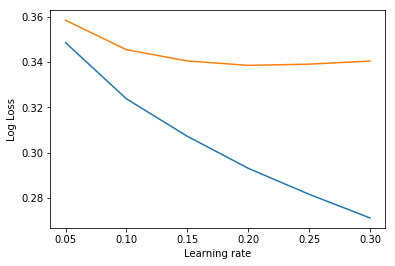

In [ ]:
test_scores = []
train_scores = []
etas = [0.05,0.1,0.15,0.2,0.25,0.3]
for i in etas:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=i,n_estimators=250,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('Learning Rate = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(etas,train_scores,label='Train Log Loss')
plt.plot(etas,test_scores,label='Test Log Loss')
plt.xlabel('Learning rate')
plt.ylabel('Log Loss')

reg_alpha =  0.5 Train Log Loss  0.18552754110016914 Test Log Loss  0.41771510824008634
reg_alpha =  1 Train Log Loss  0.18708247507165138 Test Log Loss  0.42690521142320964
reg_alpha =  5 Train Log Loss  0.1889097248930446 Test Log Loss  0.4139238847946861
reg_alpha =  10 Train Log Loss  0.19732091498184656 Test Log Loss  0.4020169662291672
reg_alpha =  50 Train Log Loss  0.2404195343979278 Test Log Loss  0.364811240860891
reg_alpha =  100 Train Log Loss  0.3044636385472295 Test Log Loss  0.35583897909062384
reg_alpha =  150 Train Log Loss  0.3439979601721529 Test Log Loss  0.36513114237933575


Text(0,0.5,'Log Loss')

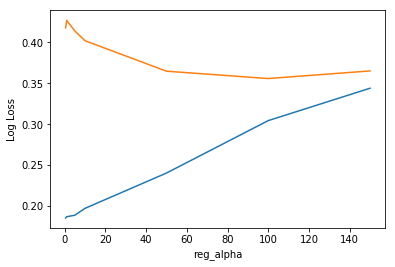

In [ ]:
test_scores = []
train_scores = []
alpha = [0.5,1,5,10,50,100,150]
for i in alpha:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.95,n_estimators=250,reg_alpha=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('reg_alpha = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(alpha,train_scores,label='Train Log Loss')
plt.plot(alpha,test_scores,label='Test Log Loss')
plt.xlabel('reg_alpha')
plt.ylabel('Log Loss')

In [ ]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.2),
              "n_estimators":sp_randint(200,350),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(100,300),
              "reg_lambda":uniform(100,300)}

model_rs_xgb = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=30,scoring='neg_log_loss',cv=5,n_jobs=-1)
model_rs_xgb.fit(X_train,y_train)
pickle.dump(model_rs_xgb,open('model_rs_xgb.p','wb'))

In [ ]:
dict_scores = []
idx = 0
for i in model_rs_xgb.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                               'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [ ]:
scores_df.sort_values('Test_score').head(10)

n_estimators  depth  subsample  min_child_weight  learning_rate  \
21           312      4   0.862849                 7       0.078998   
6            237      3   0.918557                 7       0.093173   
2            252      4   0.861955                 5       0.147171   
3            260      2   0.883727                 5       0.162472   
1            263      3   0.989867                 6       0.134493   
10           287      4   0.727813                 3       0.083195   
0            335      4   0.836968                 3       0.069301   
28           324      3   0.982237                 3       0.060558   
26           257      3   0.737091                 3       0.094935   
13           211      3   0.743472                 7       0.082667   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
21  151.329530  368.527334  2.475153          0.889555    0.365552  0.004887   
6   141.951036  247.381210  2.147542          0.959726    0.370005  0.005169   
2   211.574781  237.988483  1.297998          0.914696    0.371073  0.005258   
3   140.330037  125.075348  0.928819          0.723344    0.371593  0.004502   
1   201.904989  291.399625  1.215903          0.976700    0.374411  0.005102   
10  194.466489  393.672716  1.808000          0.963584    0.374655  0.005214   
0   215.509247  341.789604  2.932693          0.905324    0.375133  0.004916   
28  205.901274  176.926146  3.485774          0.748520    0.376651  0.004448   
26  183.424671  264.413431  1.303816          0.824543    0.377248  0.005051   
13  159.094695  283.155601  3.633829          0.982659    0.379051  0.004702   

    Train_score  
21     0.355803  
6      0.363034  
2      0.363501  
3      0.365183  
1      0.368895  
10     0.368341  
0      0.369223  
28     0.371700  
26     0.372042  
13     0.374420

The test log loss is: 0.362546103674608


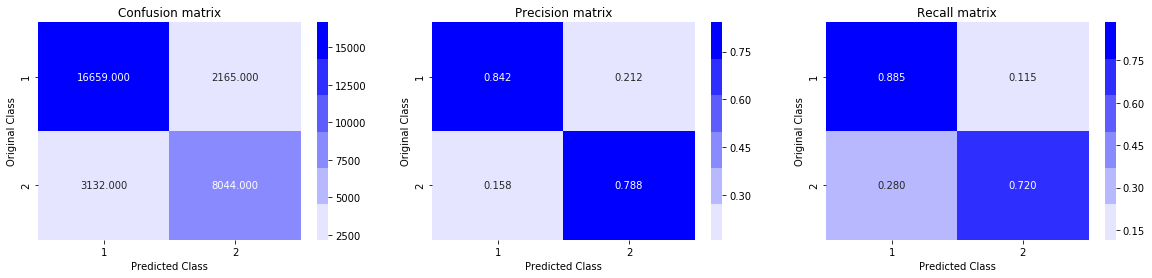

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.078998,n_estimators=312,
                        min_child_weight=7,subsample=0.862849,
                        reg_alpha=151.329530,reg_lambda=368.527334,
                        colsample_bytree=0.889555,gamma=2.475153,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

### With Tf-Idf features

In [ ]:
data.columns[0:26]

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [ ]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [ ]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = dfnlp[['id','question1','question2']]
duplicate = dfnlp.is_duplicate

In [ ]:
df1.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [ ]:
df2.columns

Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
       'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
       'freq_q1-q2'],
      dtype='object')

In [ ]:
df3.columns

Index(['id', 'question1', 'question2'], dtype='object')

so for Tf-Idf Features i am combining question1 and question2, then getting Tf-Idf for for Train and transforming test.

In [ ]:
df3 = df3.fillna(' ')
df4 = pd.DataFrame()
df4['Text'] = df3.question1 + ' ' + df3.question2
df4['id'] = df3.id

#### Combining question1 and question2, then getting Tf-Idf

In [ ]:
df2['id']=df1['id']
df4['id']=df1['id']
df5  = df1.merge(df2, on='id',how='left')
final  = df5.merge(df4, on='id',how='left')

In [ ]:
final.columns

Index(['id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'Text'],
      dtype='object')

In [ ]:
final = final.drop('id',axis=1)

In [ ]:
X_train_tf,X_test_tf, y_train_tf, y_test_tf = train_test_split(final,duplicate, stratify=y_true, test_size=0.3,random_state=13)

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,3),max_features=200000,min_df=0.000032)
train_tfidf = tfidf_vect.fit_transform(X_train_tf.Text)
test_tfidf = tfidf_vect.transform(X_test_tf.Text)
print('No of Tfidf features',len(tfidf_vect.get_feature_names()))

No of Tfidf features 122967


In [ ]:
X_train_tf = X_train_tf.drop('Text',axis=1)
X_test_tf = X_test_tf.drop('Text',axis=1)

In [ ]:
from scipy.sparse import hstack
X_train1 = hstack((X_train_tf.values,train_tfidf))
X_test1 = hstack((X_test_tf.values,test_tfidf))

In [ ]:
X_train1

<283003x122993 sparse matrix of type '<class 'numpy.float64'>'
	with 16070821 stored elements in COOrdinate format>

In [ ]:
scale = StandardScaler(with_mean=False)
X_train_sc = scale.fit_transform(X_train1)
X_test_sc = scale.transform(X_test1)

For values of alpha =  1e-05 The log loss is: 0.43314008705729606
For values of alpha =  0.0001 The log loss is: 0.4331272796939656
For values of alpha =  0.001 The log loss is: 0.4327302472283095
For values of alpha =  0.01 The log loss is: 0.4283776670722629
For values of alpha =  0.1 The log loss is: 0.3881322803856421
For values of alpha =  1 The log loss is: 0.40257550672626424
For values of alpha =  10 The log loss is: 0.4613941629266127


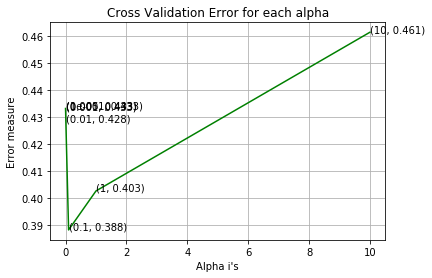

For values of best alpha =  0.1 The train log loss is: 0.26985162323505474
For values of best alpha =  0.1 The test log loss is: 0.3881322803856421
Total number of data points : 121287


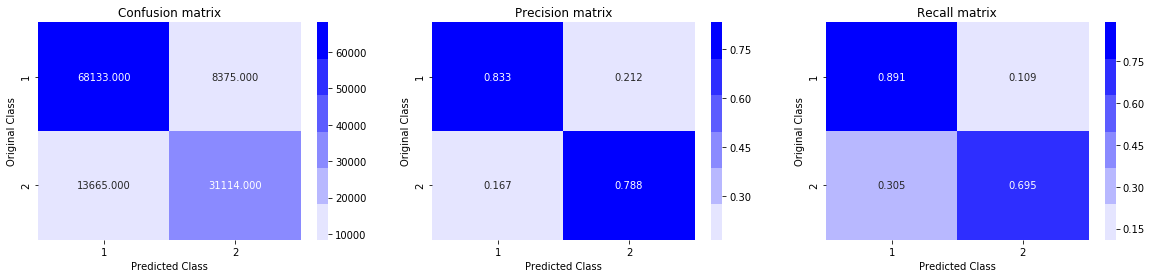

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.0795 The log loss is: 0.39064417583295863
For values of alpha =  0.0879 The log loss is: 0.3894558074210688
For values of alpha =  0.116 The log loss is: 0.3869327250039135
For values of alpha =  0.1481 The log loss is: 0.38565275085466144
For values of alpha =  0.1612 The log loss is: 0.3854195068372494
For values of alpha =  0.2439 The log loss is: 0.3856745506873943
For values of alpha =  0.2538 The log loss is: 0.38581966177962984
For values of alpha =  0.2633 The log loss is: 0.3859735181868948
For values of alpha =  0.27 The log loss is: 0.38608826320451
For values of alpha =  0.2905 The log loss is: 0.38646998649269443
For values of alpha =  0.3092 The log loss is: 0.3868477094820089
For values of alpha =  0.3229 The log loss is: 0.387144248260163
For values of alpha =  0.4396 The log loss is: 0.389928810977827
For values of alpha =  0.441 The log loss is: 0.389963612599141


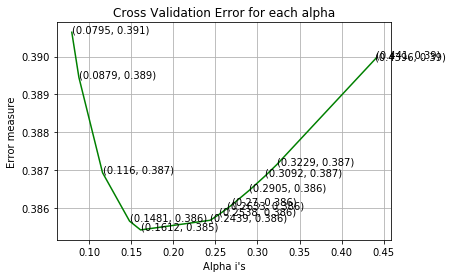

For values of best alpha =  0.1612 The train log loss is: 0.2749225188463317
For values of best alpha =  0.1612 The test log loss is: 0.3854195068372494
Total number of data points : 121287


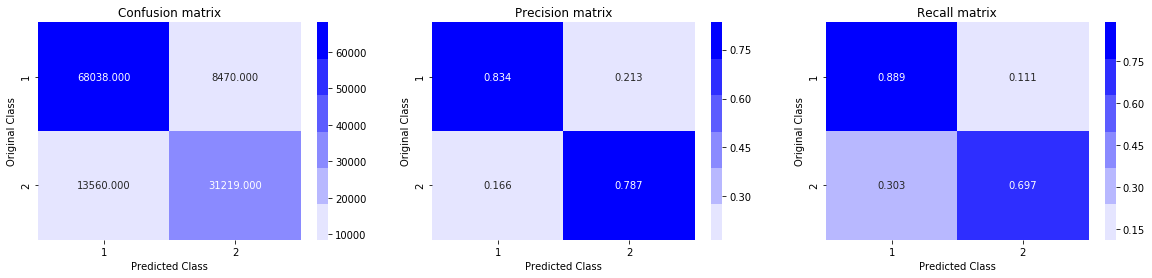

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------
alpha = np.random.uniform(0.05,0.5,14)
alpha = np.round(alpha,4)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_sc, y_train)
    predict_y = sig_clf.predict_proba(X_test_sc)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_sc, y_train)

predict_y = sig_clf.predict_proba(X_train_sc)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_sc)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

it was giving some good scores but it seems to be some overfitting in this.  
i think it may be because of feature scaling for all the data including tfidf values so i tried without feature scaling

For values of alpha =  1e-05 The log loss is: 0.45919822041900693
For values of alpha =  0.0001 The log loss is: 0.4663672071140698
For values of alpha =  0.001 The log loss is: 0.4492402172589541
For values of alpha =  0.01 The log loss is: 0.44994060193898233
For values of alpha =  0.1 The log loss is: 0.46275295853045256
For values of alpha =  1 The log loss is: 0.4939560730721335
For values of alpha =  10 The log loss is: 0.5434258589612511


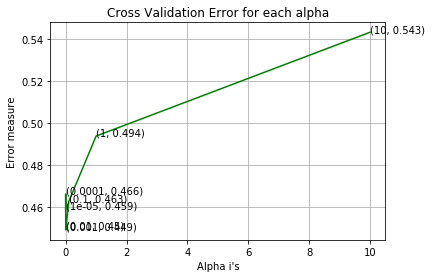

For values of best alpha =  0.001 The train log loss is: 0.4489866787327462
For values of best alpha =  0.001 The test log loss is: 0.4492402172589541
Total number of data points : 121287


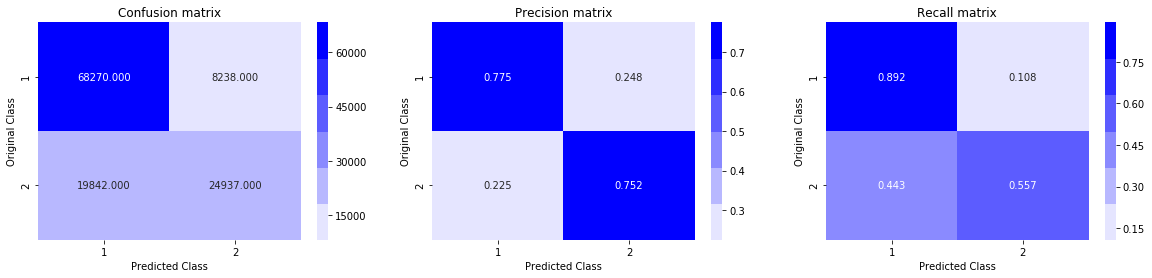

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train1, y_train)
    predict_y = sig_clf.predict_proba(X_test1)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train1, y_train)

predict_y = sig_clf.predict_proba(X_train1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

i decresed overfittig but bias increased.
Tought like i will scale features otherthan Tf-Idf and Tf-Idf was already coming with l2 normalization. so tried with this format below

In [ ]:
scale = StandardScaler()
X_train_some = scale.fit_transform(X_train_tf)
X_test_some = scale.transform(X_test_tf)

In [ ]:
from scipy.sparse import hstack
X_train2 = hstack((X_train_some,train_tfidf))
X_test2 = hstack((X_test_some,test_tfidf))

For values of alpha =  1e-05 The log loss is: 0.3592485420041076
For values of alpha =  0.0001 The log loss is: 0.38220592755894905
For values of alpha =  0.001 The log loss is: 0.4040174130069092
For values of alpha =  0.01 The log loss is: 0.4228198041131542
For values of alpha =  0.1 The log loss is: 0.4598042497583823
For values of alpha =  1 The log loss is: 0.5086852562507405
For values of alpha =  10 The log loss is: 0.534388446481064


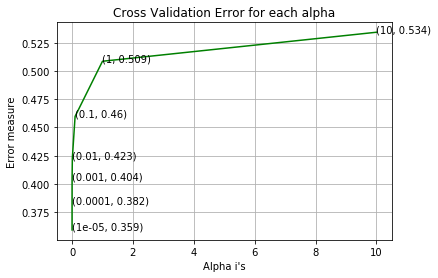

For values of best alpha =  1e-05 The train log loss is: 0.3395431324943519
For values of best alpha =  1e-05 The test log loss is: 0.3592485420041076
Total number of data points : 121287


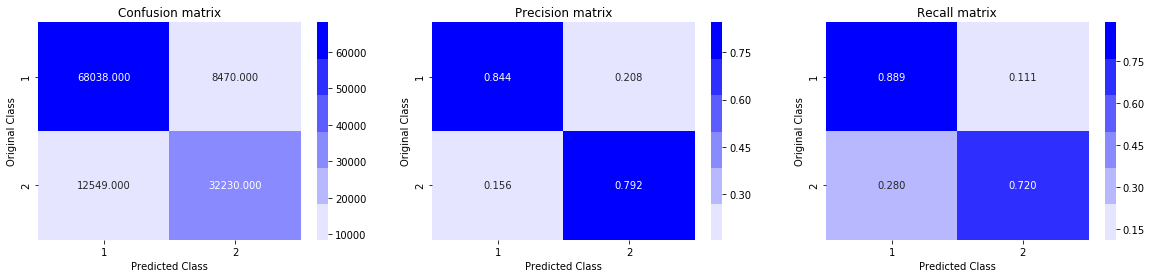

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

Now it seems to be good

For values of alpha =  4.13e-06 The log loss is: 0.36122866843967544
For values of alpha =  5.47e-06 The log loss is: 0.3588790251668011
For values of alpha =  7.73e-06 The log loss is: 0.3584450374617226
For values of alpha =  8.84e-06 The log loss is: 0.3588864116809375
For values of alpha =  9.38e-06 The log loss is: 0.3590125699678223
For values of alpha =  1.143e-05 The log loss is: 0.35994931400868724
For values of alpha =  1.583e-05 The log loss is: 0.3624907902604967
For values of alpha =  1.628e-05 The log loss is: 0.3626844556970233
For values of alpha =  1.782e-05 The log loss is: 0.36357454612123535
For values of alpha =  1.914e-05 The log loss is: 0.3641980673263202
For values of alpha =  2.192e-05 The log loss is: 0.36554921230584847
For values of alpha =  2.659e-05 The log loss is: 0.3674344684859557
For values of alpha =  2.69e-05 The log loss is: 0.3675203002315432
For values of alpha =  2.832e-05 The log loss is: 0.3680707978055651


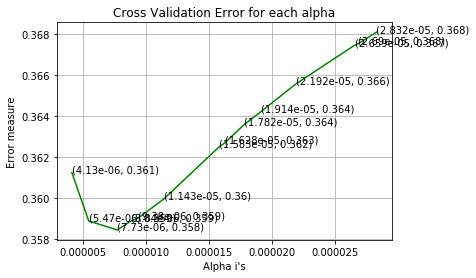

For values of best alpha =  7.73e-06 The train log loss is: 0.3368825243663587
For values of best alpha =  7.73e-06 The test log loss is: 0.3584450374617226
Total number of data points : 121287


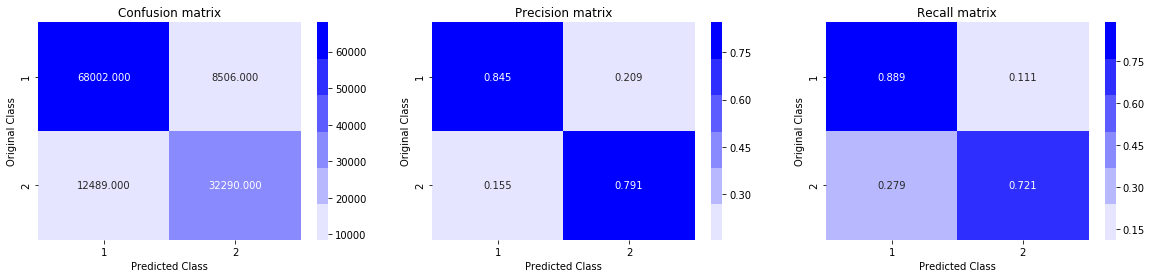

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------
alpha = np.random.uniform(0.000002,0.00003,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#### Linear SVM with Hyperparameter tuning:

For values of alpha =  1e-05 The log loss is: 0.3798066793143051
For values of alpha =  0.0001 The log loss is: 0.38116712269147246
For values of alpha =  0.001 The log loss is: 0.40184830286142403
For values of alpha =  0.01 The log loss is: 0.41845776341903373
For values of alpha =  0.1 The log loss is: 0.4644497805778554
For values of alpha =  1 The log loss is: 0.5049977600164108
For values of alpha =  10 The log loss is: 0.5394307111628995


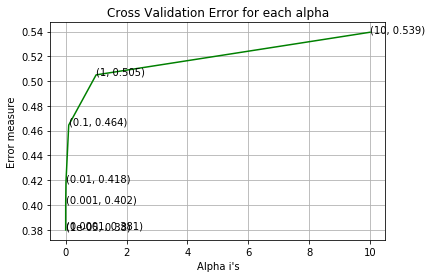

For values of best alpha =  1e-05 The train log loss is: 0.3607393522040741
For values of best alpha =  1e-05 The test log loss is: 0.3798066793143051
Total number of data points : 121287


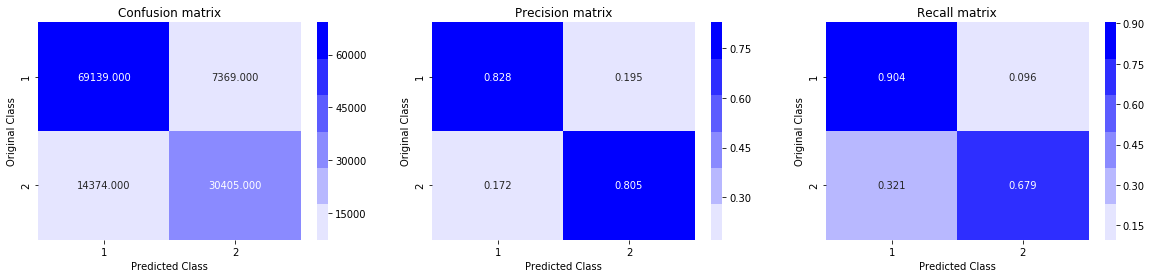

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  6.61e-06 The log loss is: 0.3707146846644485
For values of alpha =  8.2e-06 The log loss is: 0.36699067890864273
For values of alpha =  8.32e-06 The log loss is: 0.3740658586177854
For values of alpha =  1.667e-05 The log loss is: 0.36752693609047854
For values of alpha =  1.683e-05 The log loss is: 0.3729555362549245
For values of alpha =  1.745e-05 The log loss is: 0.3705911233029048
For values of alpha =  1.769e-05 The log loss is: 0.36204932154873615
For values of alpha =  1.943e-05 The log loss is: 0.36547605004579575
For values of alpha =  2.237e-05 The log loss is: 0.3751313041730113
For values of alpha =  2.323e-05 The log loss is: 0.3760910650204779
For values of alpha =  2.555e-05 The log loss is: 0.37836011165769023
For values of alpha =  2.707e-05 The log loss is: 0.3684866481434041
For values of alpha =  2.739e-05 The log loss is: 0.37263448797034704
For values of alpha =  2.745e-05 The log loss is: 0.3724051898117524


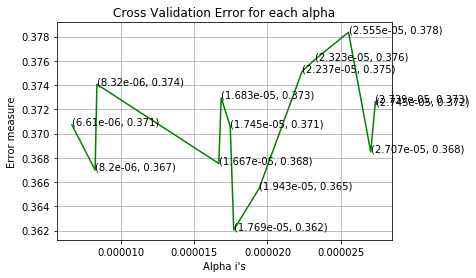

For values of best alpha =  1.769e-05 The train log loss is: 0.343773971608721
For values of best alpha =  1.769e-05 The test log loss is: 0.36204932154873615
Total number of data points : 121287


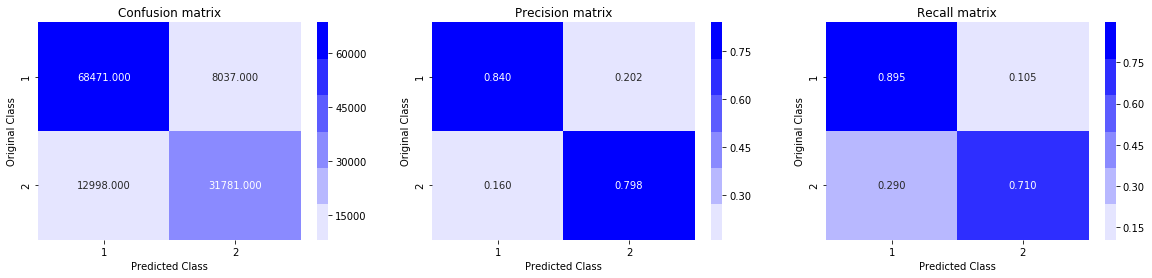

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------
alpha = np.random.uniform(0.000002,0.00003,14)
alpha = np.round(alpha,8)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train2, y_train)
    predict_y = sig_clf.predict_proba(X_test2)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train2, y_train)

predict_y = sig_clf.predict_proba(X_train2)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test2)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#### With some others features:

In [ ]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [ ]:
def remove_stop(sent):
    sent  = str(sent)
    if sent == None:
        return ' '
    if sent==np.nan:
        return ' '
    if sent == 'NaN':
        return ' '
    z = [i for i in sent.split() if i not in STOP_WORDS]
    return ' '.join(z)

In [ ]:
dfnlp['question1'] = dfnlp.question1.apply(remove_stop)

In [ ]:
dfnlp['question2'] = dfnlp.question2.apply(remove_stop)

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import gensim

In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2018-07-10 11:38:55--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2018-07-10 11:38:55--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

100%[====================================>] 2,176,768,927 6.10MB/s   in 9m 16s 

2018-07-10 11:48:11 (3.74 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [ ]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="glove.840B.300d.txt", word2vec_output_file="glove_vectors.txt")

(2196017, 300)

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("glove_vectors.txt", binary=False)

In [ ]:
def wmd(s1, s2,model):
    s1 = str(s1)
    s2 = str(s2)
    s1 = s1.split()
    s2 = s2.split()
    return model.wmdistance(s1, s2)

http://proceedings.mlr.press/v37/kusnerb15.pdf i read about word mover distance and after that i calculated some distances from avg word vectors as below

In [ ]:
dfnlp['Word_Mover_Dist'] = dfnlp.apply(lambda x: wmd(x['question1'], x['question2'],glove_model), axis=1)

In [ ]:
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v(list_of_sent,model,d):
    '''
    Returns average of word vectors for
    each sentance with dimension of model given
    '''
    sent_vectors = []
    for sent in list_of_sent: # for each review/sentence
        doc = [word for word in sent if word in model.wv.vocab]
        if doc:
            sent_vec = np.mean(model.wv[doc],axis=0)
        else:
            sent_vec = np.zeros(d)
        sent_vectors.append(sent_vec)
    return sent_vectors

In [ ]:
#converting into lists
list_of_question1=[]
for sent in dfnlp.question1.values:
    list_of_question1.append(sent.split())
list_of_question2=[]
for sent in dfnlp.question2.values:
    list_of_question2.append(sent.split())

In [ ]:
#avg word 2 vec
avgw2v_q1 = avg_w2v(list_of_question1,glove_model,300)
avgw2v_q2 = avg_w2v(list_of_question2,glove_model,300)

In [ ]:
#converting as df
df_avgw2v = pd.DataFrame()
df_avgw2v['q1_vec'] = list(avgw2v_q1)
df_avgw2v['q2_vec'] = list(avgw2v_q2)
df_q1 = pd.DataFrame(df_avgw2v.q1_vec.values.tolist())
df_q2 = pd.DataFrame(df_avgw2v.q2_vec.values.tolist())

In [ ]:
#importing soma distances and calculating
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock,canberra, euclidean, minkowski
dfnlp['dist_cosine'] = [cosine(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_cityblock'] = [cityblock(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_canberra'] = [canberra(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_euclidean'] = [euclidean(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]
dfnlp['dist_minkowski'] = [minkowski(x, y) for (x, y) in zip(avgw2v_q1,avgw2v_q2)]

In [ ]:
#filling na values with 0  for cosine distance
dfnlp.dist_cosine = dfnlp.dist_cosine.fillna(0)

In [ ]:
#merzing all df
df_q1.reset_index(inplace=True)
df_q2.reset_index(inplace=True)
df_q1['index'] = df_q2['index']
df_avgw2v_final = df_q1.merge(df_q2, on='index',how='left')

In [ ]:
#for final df
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [ ]:
##merging all
df1.id = df_avgw2v.index
df2.id = df_avgw2v.index
df_temp = df1.merge(df2,on='id',how='left')
df_final = df_temp.merge(df_avgw2v_final,left_on='id',right_on='index',how='left')

In [ ]:
#saving to disk
df_final.to_csv('df_final_avg.csv',index=False)

In [ ]:
df_final = pd.read_csv('df_final_avg.csv')

In [ ]:
## max no after inf is 13.45 so imputed infinity with 30
df_final.Word_Mover_Dist = df_final.Word_Mover_Dist.apply(lambda x: 30 if x == np.inf else x )

In [ ]:
#set of values
np.sort(list(set(df_final.Word_Mover_Dist.values)))

array([ 0.        ,  0.10251455,  0.11491957, ..., 12.86403772,
       13.45192544, 30.        ])

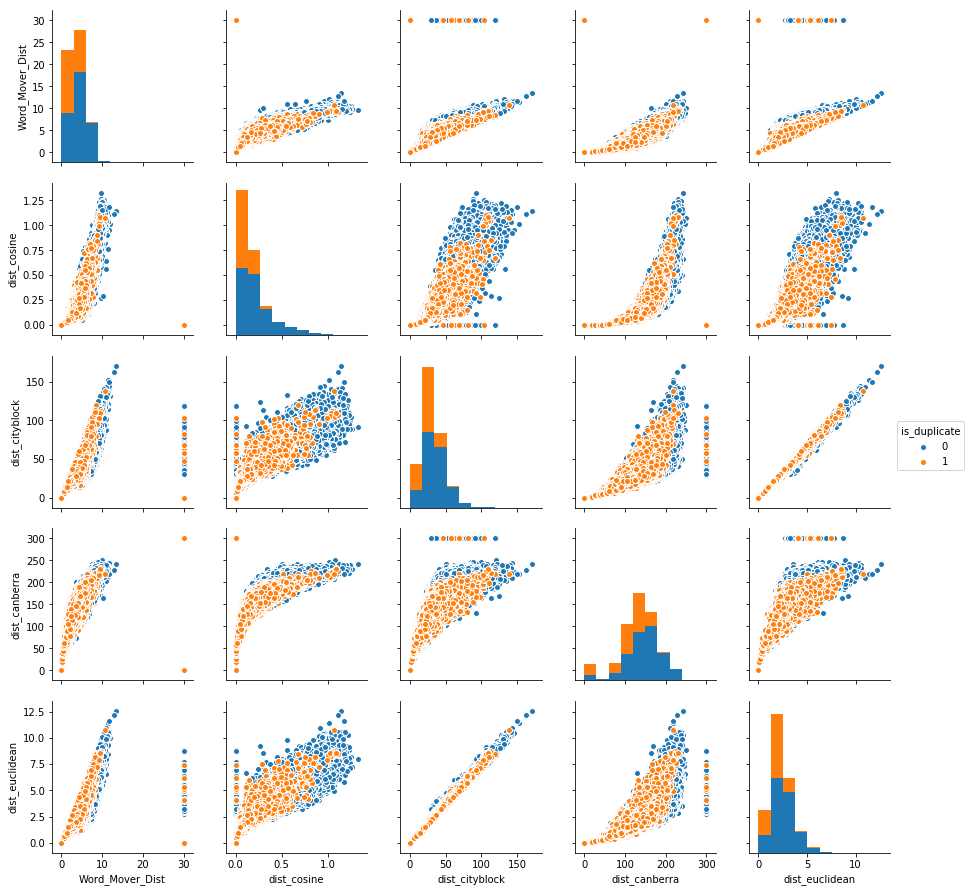

In [ ]:
n = df_final.shape[0]
sns.pairplot(df_final[['Word_Mover_Dist', 'dist_cosine', 'dist_cityblock',
                       'dist_canberra','dist_euclidean', 'is_duplicate']][0:n],
             hue='is_duplicate', vars=['Word_Mover_Dist', 'dist_cosine', 'dist_cityblock', 'dist_canberra','dist_euclidean'])
plt.show()

In [ ]:
##removing dependent varible
duplicate = df_final.is_duplicate
df_final = df_final.drop(['id','is_duplicate','index'],axis=1)

In [ ]:
 X_train,X_test, y_train, y_test = train_test_split(df_final,duplicate, stratify=duplicate, test_size=0.3,random_state=13)

In [ ]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [ ]:
scale_col = ['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
             'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
             'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'Word_Mover_Dist',
             'dist_cosine', 'dist_cityblock', 'dist_canberra', 'dist_euclidean',
             'dist_minkowski', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
             'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2']

In [ ]:
X_train_scale = X_train[scale_col]
X_test_scale = X_test[scale_col]

In [ ]:
X_train_w2v = X_train.drop(scale_col,axis=1)
X_test_w2v = X_test.drop(scale_col,axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_scale)
X_test_sc = scale.transform(X_test_scale)
X_train_sc = pd.DataFrame(X_train_sc,columns=X_train_scale.columns)
X_test_sc = pd.DataFrame(X_test_sc,columns=X_test_scale.columns)

In [ ]:
## Final train and test vectors after scaling of normal features
X_train_fi = pd.DataFrame(np.hstack((X_train_sc.values,X_train_w2v.values)),columns=df_final.columns)
X_test_fi = pd.DataFrame(np.hstack((X_test_sc.values,X_test_w2v.values)),columns=df_final.columns)

### Logistic Regression:

For values of alpha =  1e-05 The log loss is: 0.4388024128087525
For values of alpha =  0.0001 The log loss is: 0.39289765345196564
For values of alpha =  0.001 The log loss is: 0.3884671083090384
For values of alpha =  0.01 The log loss is: 0.4036735395413484
For values of alpha =  0.1 The log loss is: 0.4488595248965405
For values of alpha =  1 The log loss is: 0.4991565448915637
For values of alpha =  10 The log loss is: 0.5276589765281985


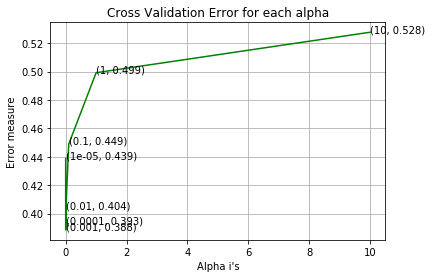

For values of best alpha =  0.001 The train log loss is: 0.38681517329784765
For values of best alpha =  0.001 The test log loss is: 0.3884671083090384
Total number of data points : 121287


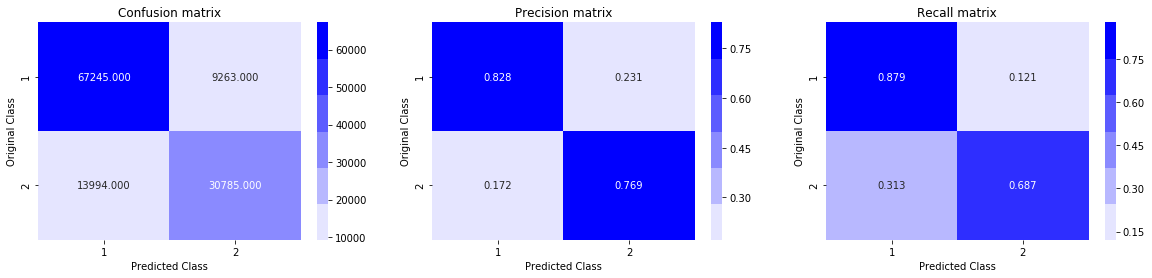

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.00081 The log loss is: 0.38825354941894474
For values of alpha =  0.000835 The log loss is: 0.3882756602391445
For values of alpha =  0.001092 The log loss is: 0.3885959531928289
For values of alpha =  0.001711 The log loss is: 0.3896869070388385
For values of alpha =  0.00275 The log loss is: 0.3917852442253969
For values of alpha =  0.002811 The log loss is: 0.39189532200667276
For values of alpha =  0.00283 The log loss is: 0.39193474315728954
For values of alpha =  0.003226 The log loss is: 0.39271932002087345
For values of alpha =  0.00347 The log loss is: 0.3932148339643286
For values of alpha =  0.004055 The log loss is: 0.39433385702572826
For values of alpha =  0.004436 The log loss is: 0.3950361601874909
For values of alpha =  0.004509 The log loss is: 0.3951700685766183
For values of alpha =  0.004863 The log loss is: 0.39583426043986775
For values of alpha =  0.004939 The log loss is: 0.39596458548444097


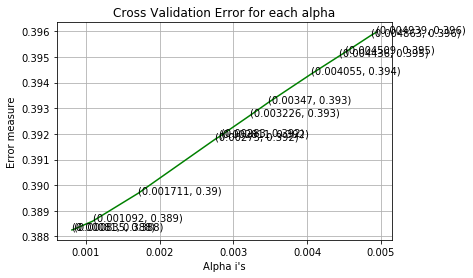

For values of best alpha =  0.00081 The train log loss is: 0.3865499173703697
For values of best alpha =  0.00081 The test log loss is: 0.38825354941894474
Total number of data points : 121287


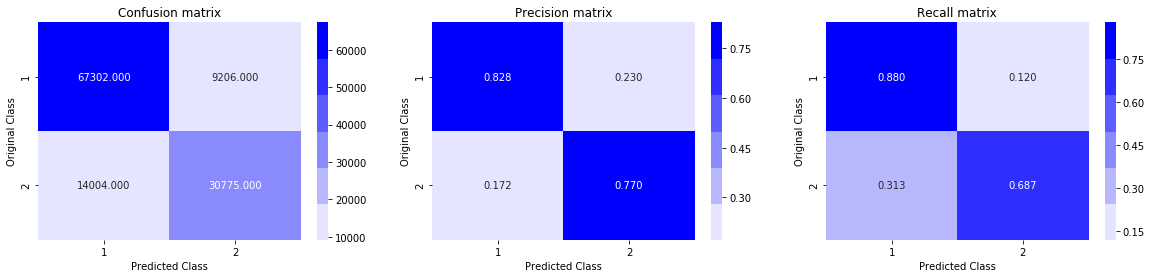

In [ ]:
#alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------
alpha = np.random.uniform(0.0005,0.005,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### SVM:

For values of alpha =  1e-05 The log loss is: 0.43193065554448745
For values of alpha =  0.0001 The log loss is: 0.4018598817909984
For values of alpha =  0.001 The log loss is: 0.3944586702255559
For values of alpha =  0.01 The log loss is: 0.39931692189061074
For values of alpha =  0.1 The log loss is: 0.4331257577821657
For values of alpha =  1 The log loss is: 0.4837845291193158
For values of alpha =  10 The log loss is: 0.5178851954488961


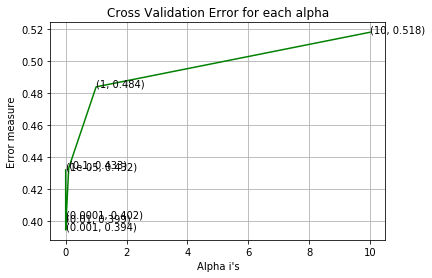

For values of best alpha =  0.001 The train log loss is: 0.39233257202331845
For values of best alpha =  0.001 The test log loss is: 0.3944586702255559
Total number of data points : 121287


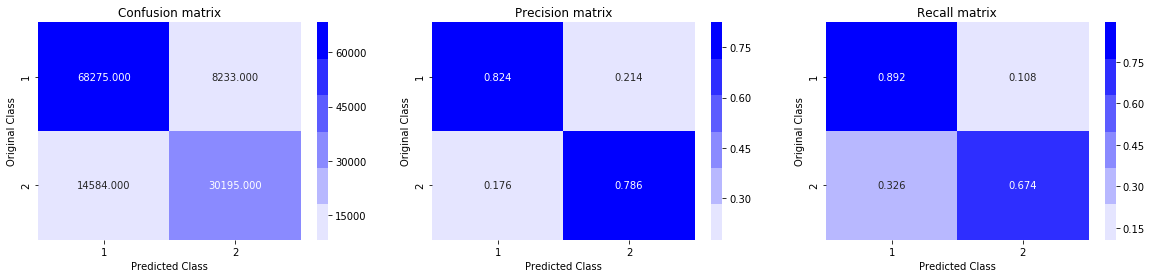

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None,
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5,
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link:
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_fi,y_train)
    predict_y = clf.predict_proba(X_train_fi)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_fi)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
#plt.plot(estimators,train_scores,label='Train Log Loss')

estimators =  100 Train Log Loss  0.35271536543312704 Test Log Loss  0.3543473342068226
estimators =  150 Train Log Loss  0.3401001847837466 Test Log Loss  0.34269603440192314
estimators =  200 Train Log Loss  0.3321450871899908 Test Log Loss  0.33594061497805644
estimators =  300 Train Log Loss  0.3211245378472585 Test Log Loss  0.3272018539308977
estimators =  400 Train Log Loss  0.313823352470929 Test Log Loss  0.3222817257843711
estimators =  600 Train Log Loss  0.3034313380014822 Test Log Loss  0.31683156878039515
estimators =  800 Train Log Loss  0.29538370418647064 Test Log Loss  0.31334181243708586


The test log loss is: 0.32395333663854076


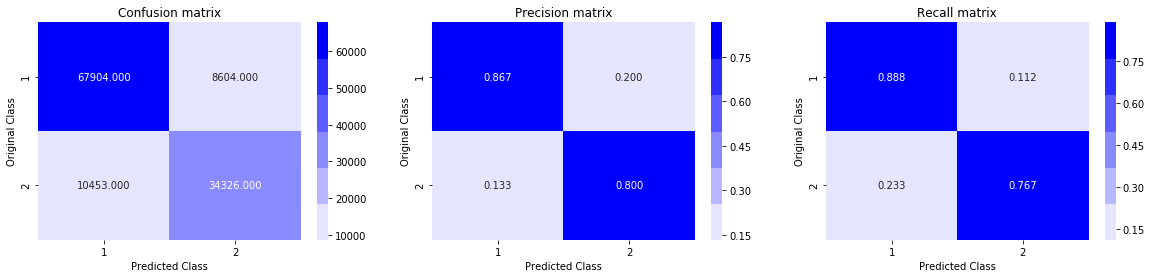

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.12,n_estimators=600,
                        min_child_weight=5,
                        reg_alpha=150,reg_lambda=350,n_jobs=-1)
clf.fit(X_train_fi,y_train)
predict_y = clf.predict_proba(X_test_fi)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
np.array(X_train_fi.columns)[np.argsort(clf.feature_importances_)[::-1]][0:50]

array(['word_share', 'freq_qid1', 'token_sort_ratio', 'cwc_max',
       'cwc_min', 'freq_qid2', 'dist_canberra', 'csc_max',
       'longest_substr_ratio', 'fuzz_ratio', 'dist_cityblock',
       'last_word_eq', 'freq_q1-q2', 'token_set_ratio', 'freq_q1+q2',
       'fuzz_partial_ratio', 'csc_min', 'first_word_eq', 'ctc_max',
       'q1len', 'Word_Mover_Dist', 'word_Common', 'abs_len_diff', '105_x',
       '105_y', 'mean_len', '86_x', 'dist_cosine', '17_y', 'ctc_min',
       '166_y', '10_y', 'dist_euclidean', '7_y', '172_x', 'q2_n_words',
       '9_y', '9_x', '25_y', '241_y', '140_y', '111_y', '258_y', '81_y',
       '150_x', '86_y', '51_x', '290_y', '124_x', '45_y'], dtype=object)

Trained XGBoost on data dropping avg word vectors with below columns

In [ ]:
X_train_scale.columns

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'Word_Mover_Dist',
       'dist_cosine', 'dist_cityblock', 'dist_canberra', 'dist_euclidean',
       'dist_minkowski', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

estimators =  100 Train Log Loss  0.353653999661756 Test Log Loss  0.3545287951428102
estimators =  150 Train Log Loss  0.34398843991044953 Test Log Loss  0.345431883757468
estimators =  200 Train Log Loss  0.3377966667026595 Test Log Loss  0.3398125918620867
estimators =  300 Train Log Loss  0.3304770724113467 Test Log Loss  0.33355668513966974
estimators =  400 Train Log Loss  0.32600683634801697 Test Log Loss  0.3303078436374958
estimators =  600 Train Log Loss  0.3204024156068844 Test Log Loss  0.3268871788204978
estimators =  800 Train Log Loss  0.31634085529657924 Test Log Loss  0.3245975335978598


Text(0,0.5,'Log Loss')

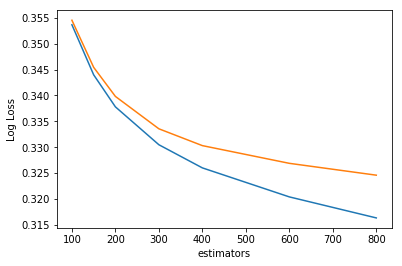

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_scale,y_train)
    predict_y = clf.predict_proba(X_train_scale)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_scale)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

In [ ]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.25),
              "n_estimators":sp_randint(300,600),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(100,300),
              "reg_lambda":uniform(100,300)}

model_rs_xgb1 = RandomizedSearchCV(xgb.XGBClassifier(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=30,scoring='neg_log_loss',cv=5,n_jobs=-1)
model_rs_xgb1.fit(X_train_scale,y_train)
pickle.dump(model_rs_xgb1,open('model_rs_xgb1.p','wb'))

In [ ]:
dict_scores = []
idx = 0
for i in model_rs_xgb1.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb1.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                               'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [ ]:
scores_df.sort_values('Test_score').head()

n_estimators  depth  subsample  min_child_weight  learning_rate  \
10           346      4   0.923334                 5       0.208953   
28           500      4   0.954113                 6       0.131131   
8            521      4   0.804484                 3       0.153277   
6            523      4   0.744275                 4       0.109158   
22           509      3   0.979516                 2       0.078085   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
10  110.805331  316.682194  1.963451          0.826112    0.332645  0.002278   
28  119.704012  115.715236  3.768808          0.911753    0.333805  0.002205   
8   124.930715  334.800298  2.453220          0.831358    0.334443  0.002472   
6   233.725584  266.540244  2.373153          0.828078    0.342799  0.002214   
22  190.352679  241.375097  0.154082          0.807970    0.343054  0.002254   

    Train_score  
10     0.327533  
28     0.329154  
8      0.329945  
6      0.340077  
22     0.340518

in my view 2nd line (28) is beeter score than forst beacuse of train test scores and test standard deviation

In [ ]:
print('Best score params')
scores_df.loc[28]

Best score params


n_estimators        500.000000
depth                 4.000000
subsample             0.954113
min_child_weight      6.000000
learning_rate         0.131131
reg_alpha           119.704012
reg_lambda          115.715236
gamma                 3.768808
colsample_bytree      0.911753
Test_score            0.333805
Test_std              0.002205
Train_score           0.329154
Name: 28, dtype: float64

The test log loss is: 0.33146013829337256


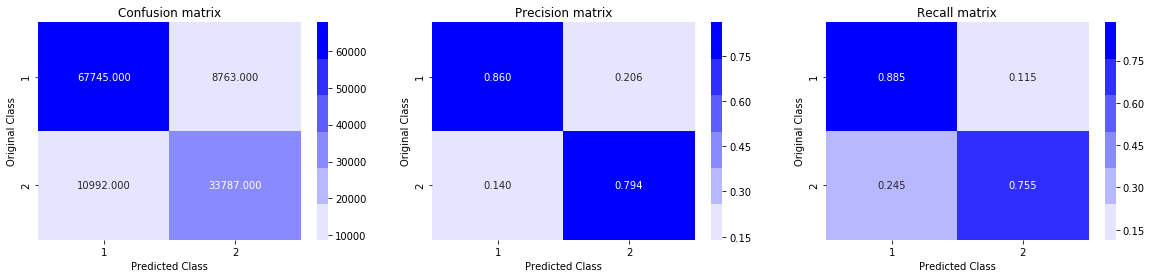

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.131131,n_estimators=500,
                        min_child_weight=6,
                        reg_alpha=119.704012,reg_lambda=115.715236,
                        gamma=3.768808,colsample_bytree=0.911753,n_jobs=-1)
clf.fit(X_train_scale,y_train)
predict_y = clf.predict_proba(X_test_scale)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)